#FUTURECART- AI DRIVEN DEMAND PREDICTION FOR SMARTER REATAIL

#Week 1

##Importing necessary libraries

In [40]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller



In [41]:
warnings.filterwarnings('ignore')

##Reading the datasets and merging them

In [66]:
import pandas as pd
import matplotlib.pylab as plt

# Define the paths to the datasets
productA_path = r'C:\Users\sravy\Downloads\ProductA.xlsx'
fb_impressions_path = r'C:\Users\sravy\Downloads\ProductA_fb_impressions.xlsx'
google_clicks_path = r'C:\Users\sravy\Downloads\ProductA_google_clicks.xlsx'

# Load the datasets into DataFrames
productA = pd.read_excel(productA_path)
fb_impressions = pd.read_excel(fb_impressions_path)
google_clicks = pd.read_excel(google_clicks_path)

# Merge the datasets on 'Day Index'
merged_data = productA.merge(google_clicks, on='Day Index').merge(fb_impressions, on='Day Index')

# Reorder the columns
merged_data = merged_data[['Day Index', 'Quantity', 'Clicks', 'Impressions']]

# Save the merged dataset to an Excel file
merged_data_path = r'C:\Users\sravy\Downloads\master_dataset.xlsx'
merged_data.to_excel(merged_data_path, index=False)

# Display the merged dataset with a heading
print("\n### Merged Data ###")
print(merged_data.head())



### Merged Data ###
   Day Index  Quantity  Clicks  Impressions
0 2021-12-01        14     445          620
1 2021-12-02        10     433          890
2 2021-12-03        13     424          851
3 2021-12-04        22     427          881
4 2021-12-05        33     451          678


##Descriptive Statistics

In [67]:
merged_data.shape

(212, 4)

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 KB


In [71]:
merged_data.describe()

Quantity     Clicks  Impressions
count  212.000000  212.00000   212.000000
mean    17.542453  358.20283  1531.702830
std      5.790423  164.52160   440.660783
min      5.000000   60.00000   620.000000
25%     13.750000  154.00000  1209.750000
50%     17.000000  402.50000  1460.000000
75%     21.000000  492.75000  1862.000000
max     38.000000  726.00000  2707.000000

#WEEK 2

#EXPLORATORY DATA ANALYSIS(EDA)

##Missing Value Check

In [72]:
print("Null values:")
merged_data.isnull().sum()

Null values:


Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

In [73]:
merged_data.shape

(212, 4)

##Dropping Duplicates

In [74]:
merged_data.drop_duplicates()

Day Index  Quantity  Clicks  Impressions
0   2021-12-01        14     445          620
1   2021-12-02        10     433          890
2   2021-12-03        13     424          851
3   2021-12-04        22     427          881
4   2021-12-05        33     451          678
..         ...       ...     ...          ...
207 2022-06-26        13     114         1218
208 2022-06-27        16     106         1311
209 2022-06-28        13     109          885
210 2022-06-29        16      60         1000
211 2022-06-30         8      65          875

[212 rows x 4 columns]

#Data Visualisation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is already loaded and contains the required columns
# If not, load the data using pd.read_csv or other appropriate method
# merged_data = pd.read_csv('path_to_your_data.csv')

# Convert 'Day Index' to datetime format
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'])


##Analysing the Outliers

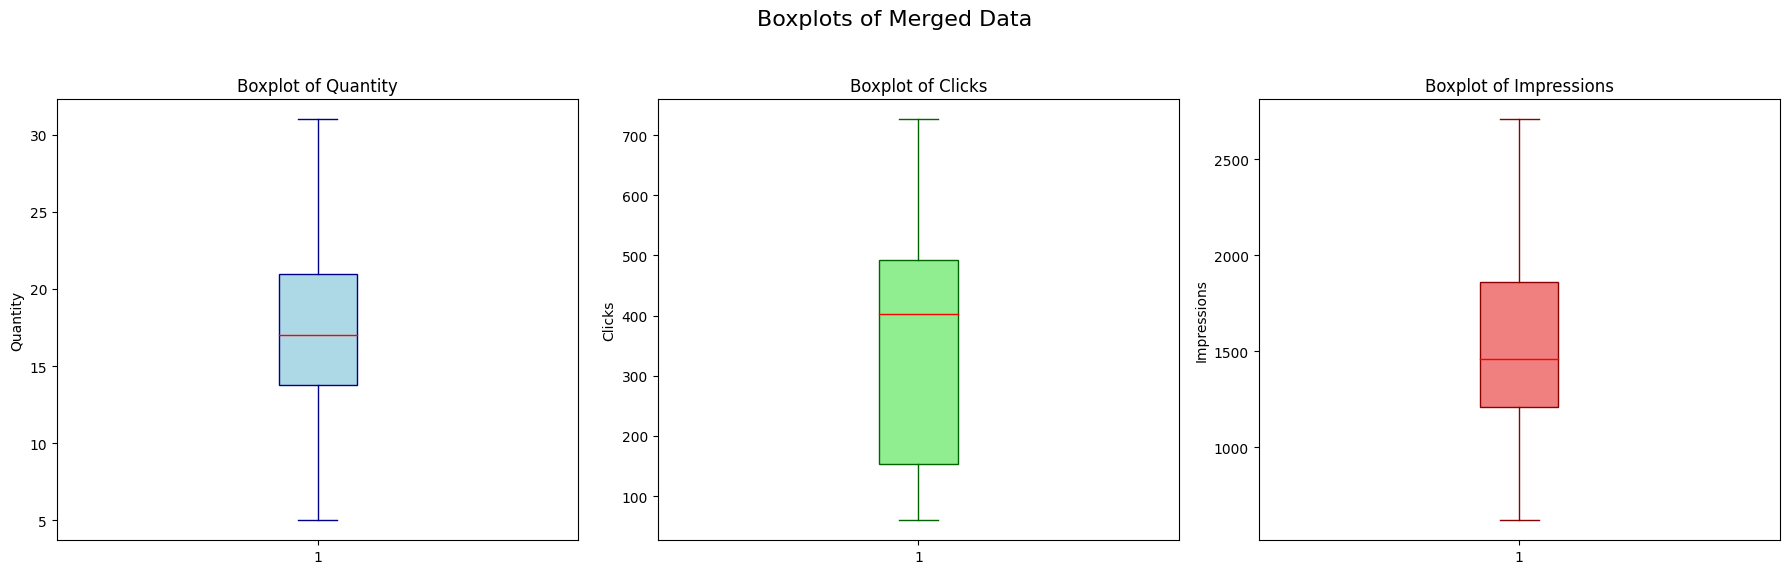

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is already loaded and contains the required columns

# Create subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for Quantity
axes[0].boxplot(merged_data['Quantity'], patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='darkblue'), 
                whiskerprops=dict(color='darkblue'),
                capprops=dict(color='darkblue'),
                medianprops=dict(color='red'))
axes[0].set_title('Boxplot of Quantity')
axes[0].set_ylabel('Quantity')

# Box plot for Clicks
axes[1].boxplot(merged_data['Clicks'], patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', color='darkgreen'), 
                whiskerprops=dict(color='darkgreen'),
                capprops=dict(color='darkgreen'),
                medianprops=dict(color='red'))
axes[1].set_title('Boxplot of Clicks')
axes[1].set_ylabel('Clicks')

# Box plot for Impressions
axes[2].boxplot(merged_data['Impressions'], patch_artist=True, 
                boxprops=dict(facecolor='lightcoral', color='darkred'), 
                whiskerprops=dict(color='darkred'),
                capprops=dict(color='darkred'),
                medianprops=dict(color='red'))
axes[2].set_title('Boxplot of Impressions')
axes[2].set_ylabel('Impressions')

# Adjust layout
plt.suptitle("Boxplots of Merged Data", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [79]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

quantity_outliers = find_outliers_iqr(merged_data, 'Quantity')

print("Quantity Outliers:")
print(quantity_outliers[['Day Index', 'Quantity']])


Quantity Outliers:
     Day Index  Quantity
4   2021-12-05        33
9   2021-12-10        38
78  2022-02-17        38
113 2022-03-24        32
142 2022-04-22        36


##Replacing the outliers with 93rd percentile value

In [82]:
def replace_outliers_with_percentile(df, column, percentile=93):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    percentile_value = df[column].quantile(percentile / 100)
    df[column] = df[column].apply(lambda x: percentile_value if x < lower_bound or x > upper_bound else x)
    return percentile_value

percentile_value = replace_outliers_with_percentile(merged_data, 'Quantity', 93)

print(f"93rd Percentile Value: {percentile_value}")


93rd Percentile Value: 26.0


In [83]:
def add_imputed_column(df, column, percentile=93):
    percentile_value = df[column].quantile(percentile / 100)
    df['Imputed_Quantity'] = df[column].apply(lambda x: percentile_value if x < df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)) or x > df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)) else x)
    return df

merged_data = add_imputed_column(merged_data, 'Quantity', 93)


In [85]:
if quantity_outliers.empty:
    print("Quantity Outliers:\n0")
else:
    print(f"Quantity Outliers:\n{quantity_outliers[['Day Index', 'Quantity']]}")


Quantity Outliers:
0


#FEATURE ENGINEERING

In [86]:
merged_data.head()

Day Index  Quantity  Clicks  Impressions  Imputed_Quantity
0 2021-12-01      14.0     445          620              14.0
1 2021-12-02      10.0     433          890              10.0
2 2021-12-03      13.0     424          851              13.0
3 2021-12-04      22.0     427          881              22.0
4 2021-12-05      26.0     451          678              26.0

In [87]:
import numpy as np

merged_data['log_quantity'] = np.log1p(merged_data['Quantity'])
merged_data['log_clicks'] = np.log1p(merged_data['Clicks'])
merged_data['log_impressions'] = np.log1p(merged_data['Impressions'])


In [88]:
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Year'] = merged_data['Day Index'].dt.year


In [89]:
merged_data['Month_Name'] = merged_data['Day Index'].dt.month_name()


In [90]:
merged_data['Day_Of_Week'] = merged_data['Day Index'].dt.day_name()


In [91]:
merged_data['Week_Of_Month'] = (merged_data['Day Index'].dt.day - 1) // 7 + 1


In [92]:
merged_data['Day_Of_Week_Numeric'] = merged_data['Day Index'].dt.weekday


In [93]:
merged_data['Month_Numeric'] = merged_data['Day Index'].dt.month


In [96]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in weekdays:
    merged_data[day] = merged_data['Day_Of_Week'].apply(lambda x: 1 if x == day else 0)


In [97]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in months:
    merged_data[month] = merged_data['Month_Name'].apply(lambda x: 1 if x == month else 0)


In [98]:
merged_data.fillna(0, inplace=True)


In [35]:
merged_data.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'Imputed_Quantity',
       'log_quantity', 'log_clicks', 'log_impressions', 'Month', 'Year',
       'Month_Name', 'Day_Of_Week', 'Week_Of_Month', 'Day_Of_Week_Numeric',
       'Month_Numeric', 'Weekday_1', 'Month_1', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
      dtype='object')

In [36]:
merged_data.head()

Day Index  Quantity  Clicks  Impressions  Imputed_Quantity  log_quantity  \
0 2021-12-01      14.0     445          620              14.0      2.708050   
1 2021-12-02      10.0     433          890              10.0      2.397895   
2 2021-12-03      13.0     424          851              13.0      2.639057   
3 2021-12-04      22.0     427          881              22.0      3.135494   
4 2021-12-05      26.0     451          678              26.0      3.295837   

   log_clicks  log_impressions  Month  Year  ... March April  May  June  July  \
0    6.100319         6.431331     12  2021  ...     0     0    0     0     0   
1    6.073045         6.792344     12  2021  ...     0     0    0     0     0   
2    6.052089         6.747587     12  2021  ...     0     0    0     0     0   
3    6.059123         6.782192     12  2021  ...     0     0    0     0     0   
4    6.113682         6.520621     12  2021  ...     0     0    0     0     0   

   August  September  October  November  December  
0       0          0        0         0         1  
1       0          0        0         0         1  
2       0          0        0         0         1  
3       0          0        0         0         1  
4       0          0        0         0         1  

[5 rows x 36 columns]

In [103]:
merged_data.to_csv('final_dataset.csv', index=False)


##Correlation Heatmap

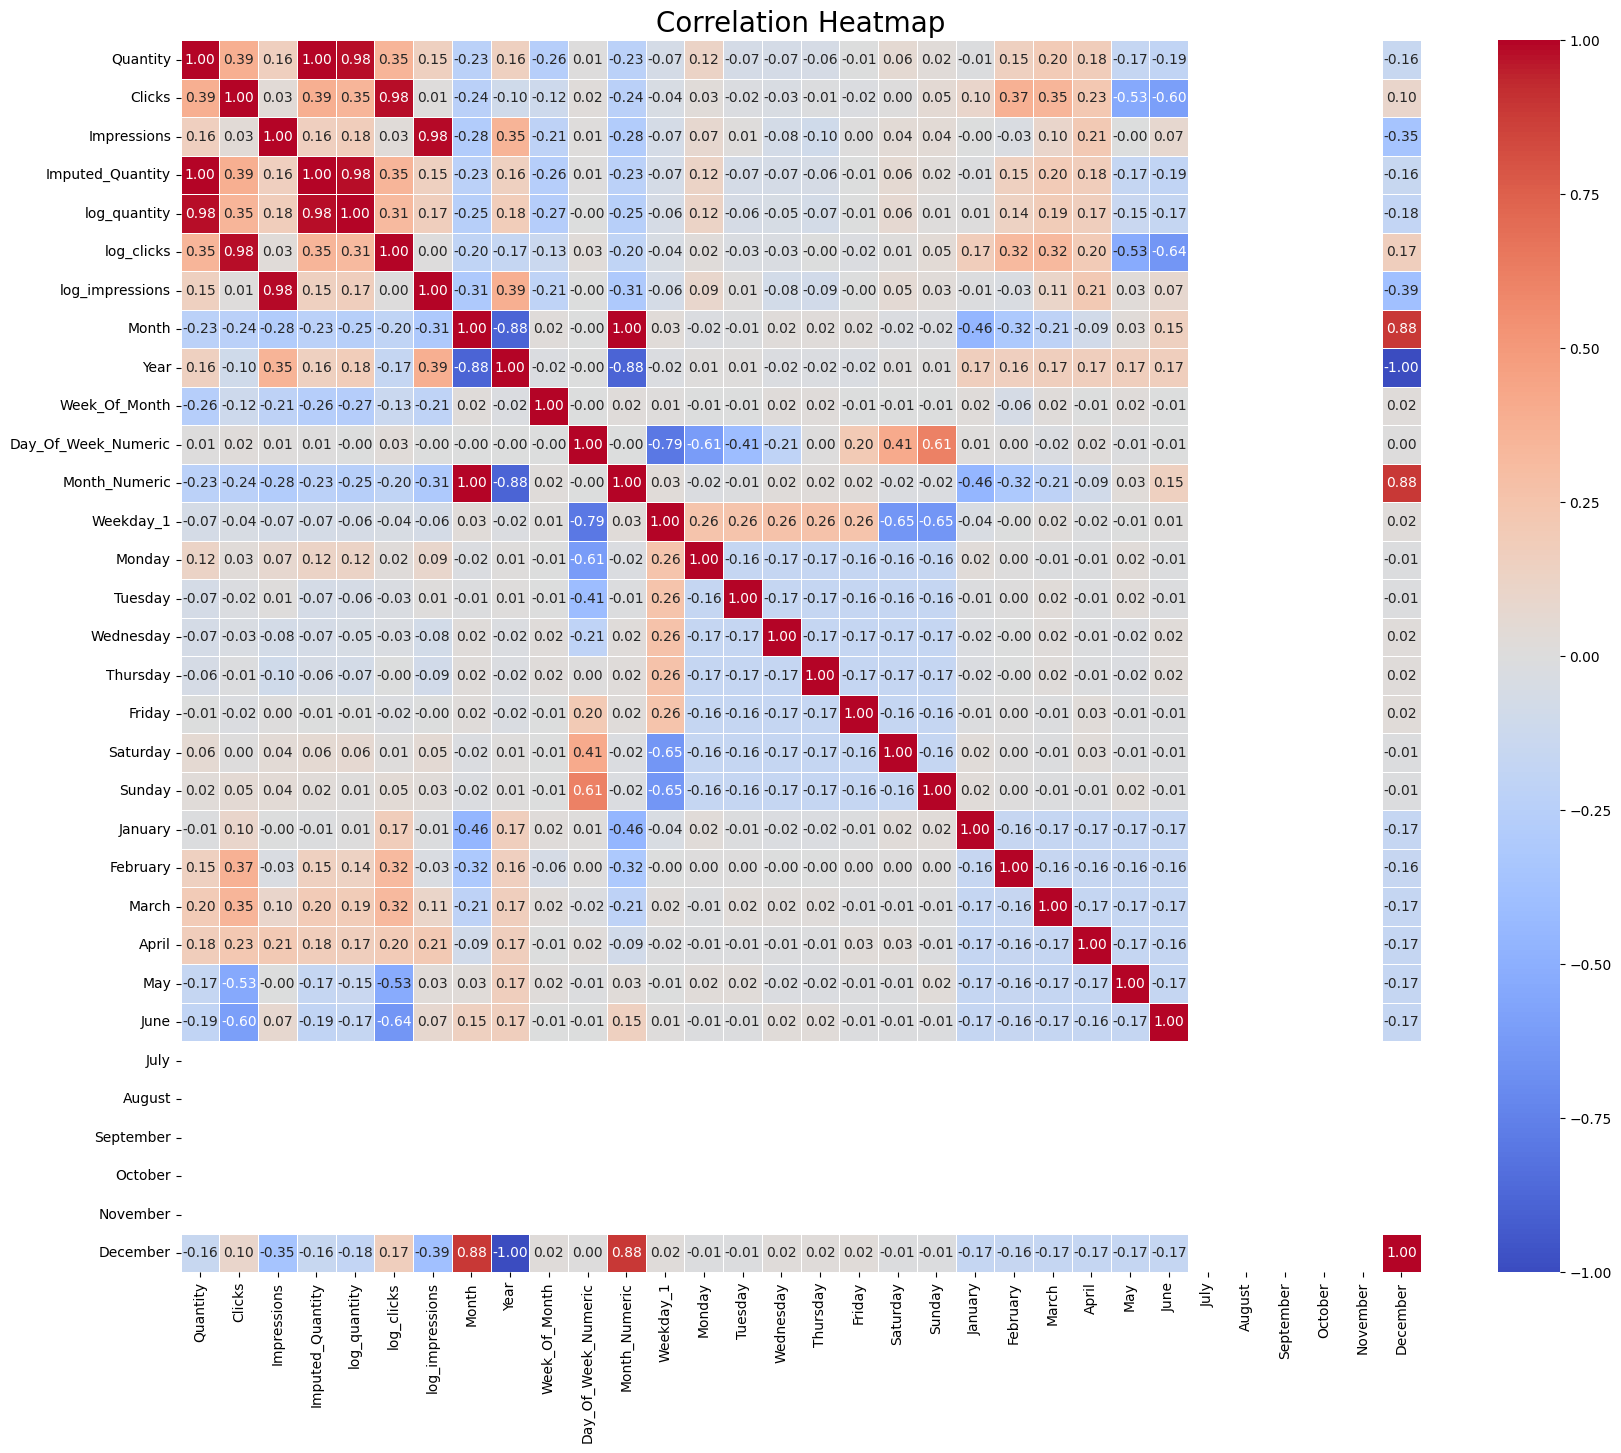

In [109]:
# Drop the 'month_1' column
merged_data = merged_data.drop(columns=['Month_1'], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


####There is a strong positive correlation between Quantity and Clicks.
Impressions have a moderate positive correlation with Quantity.
Impressions and Clicks have a very weak positive correlation.

##Scatter Plots showing different comparisions

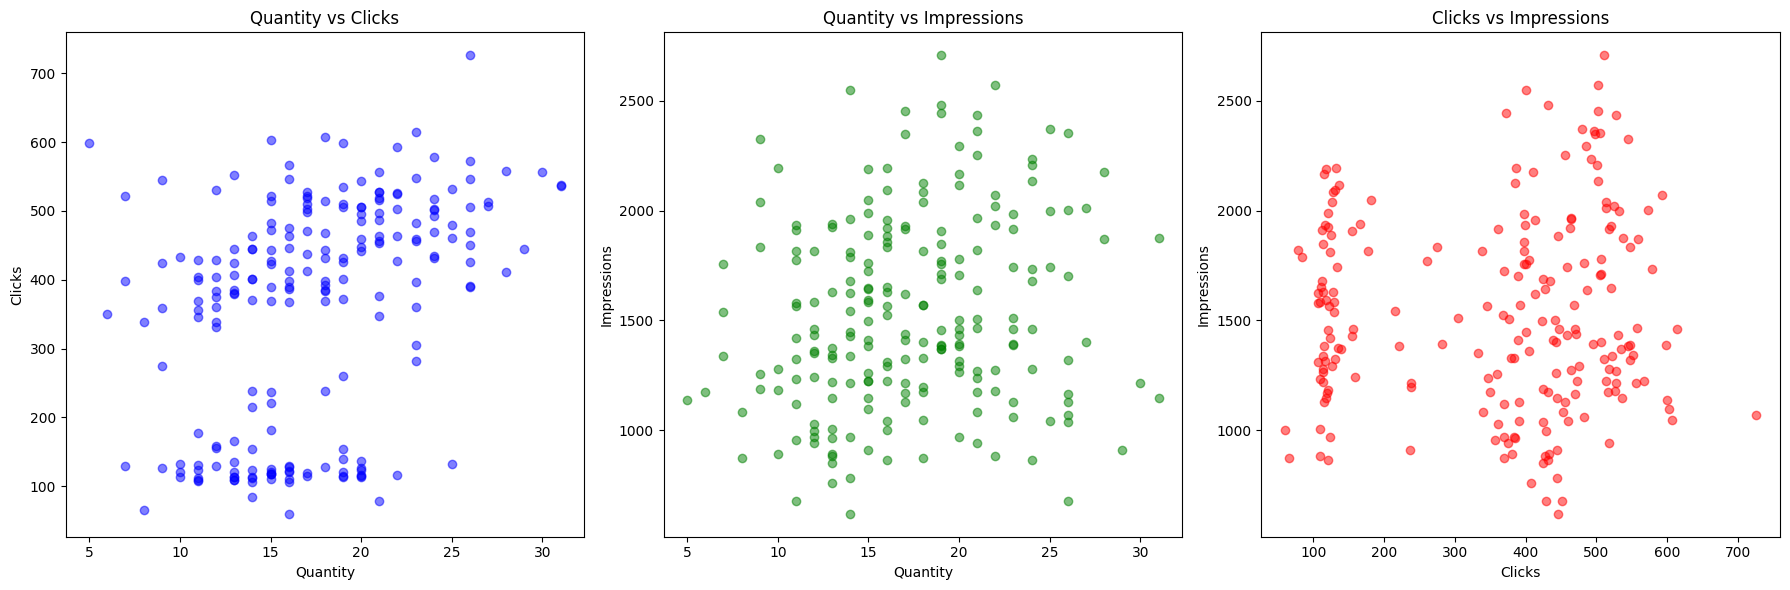

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
merged_data = pd.read_csv('final_dataset.csv')

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Quantity vs Clicks
axes[0].scatter(merged_data['Quantity'], merged_data['Clicks'], c='blue', alpha=0.5)
axes[0].set_title('Quantity vs Clicks')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Clicks')

# Plot Quantity vs Impressions
axes[1].scatter(merged_data['Quantity'], merged_data['Impressions'], c='green', alpha=0.5)
axes[1].set_title('Quantity vs Impressions')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Impressions')

# Plot Clicks vs Impressions
axes[2].scatter(merged_data['Clicks'], merged_data['Impressions'], c='red', alpha=0.5)
axes[2].set_title('Clicks vs Impressions')
axes[2].set_xlabel('Clicks')
axes[2].set_ylabel('Impressions')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



####These are three scatter plots showing Quantity vs Clicks & Qyanity vs Impressions and Clics vs Impressions

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from CSV file
merged_data = pd.read_csv('final_dataset.csv')

# Convert 'Day Index' to datetime
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'])

# Group by Day Index and sum the Quantity for each day
daily_quantity = merged_data.groupby(merged_data['Day Index'].dt.date)['Quantity'].sum()
daily_clicks = merged_data.groupby(merged_data['Day Index'].dt.date)['Clicks'].sum()
daily_impressions = merged_data.groupby(merged_data['Day Index'].dt.date)['Impressions'].sum()
daily_total = merged_data.groupby(merged_data['Day Index'].dt.date)[['Quantity', 'Clicks', 'Impressions']].sum()
weekday_quantity = merged_data.groupby(merged_data['Day Index'].dt.dayofweek)['Quantity'].sum()
weekday_quantity.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

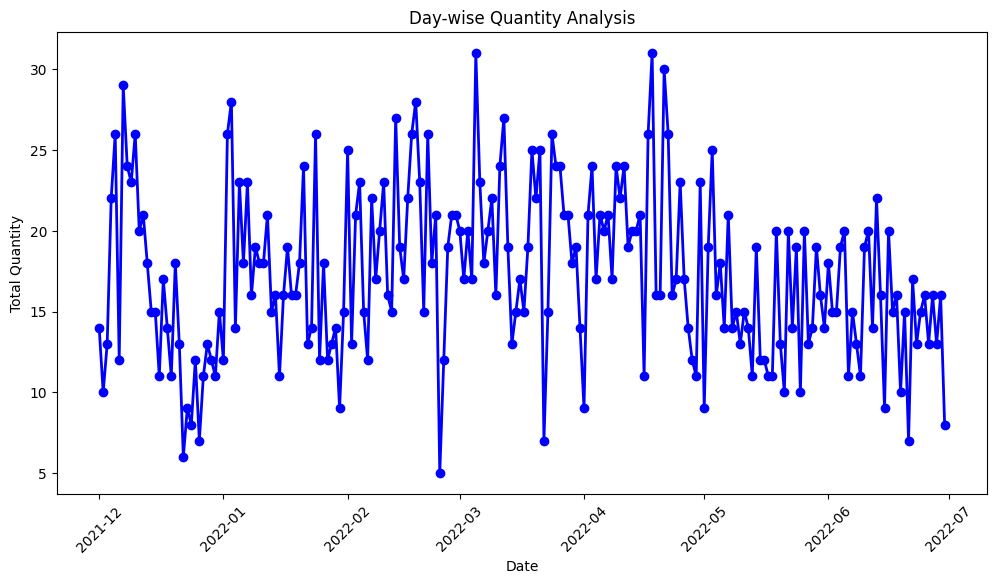

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(daily_quantity.index, daily_quantity.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Day-wise Quantity Analysis')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


##Day-wise Qunatity analysis

####Sales are peaked in December,March and April and least impressions in End of december and January

##Day-wise Clicks Analysis

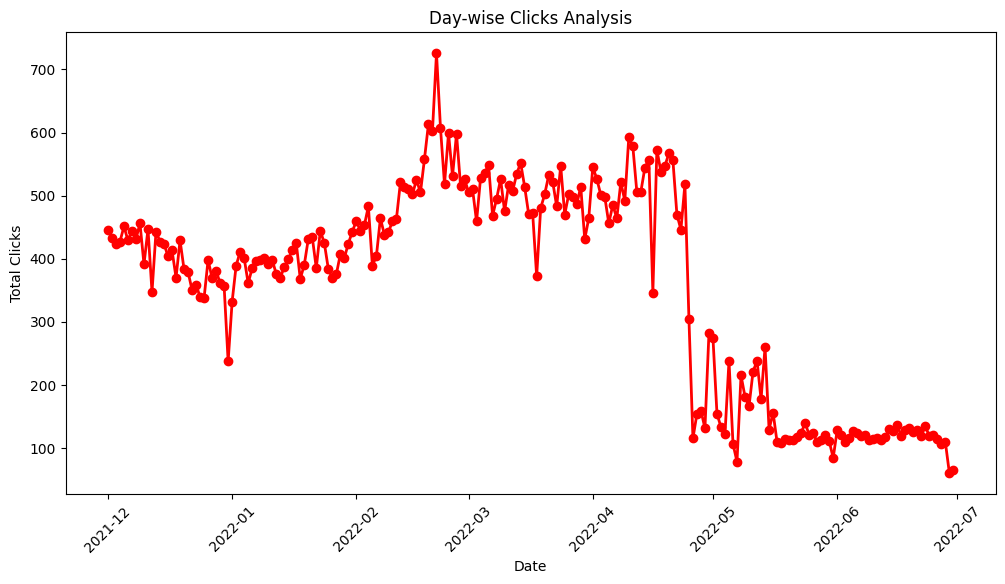

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_clicks.index, daily_clicks.values, marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Day-wise Clicks Analysis')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.show()

####Clicks Peaked in Mid-February.

##Day-wise Impressions Analysis

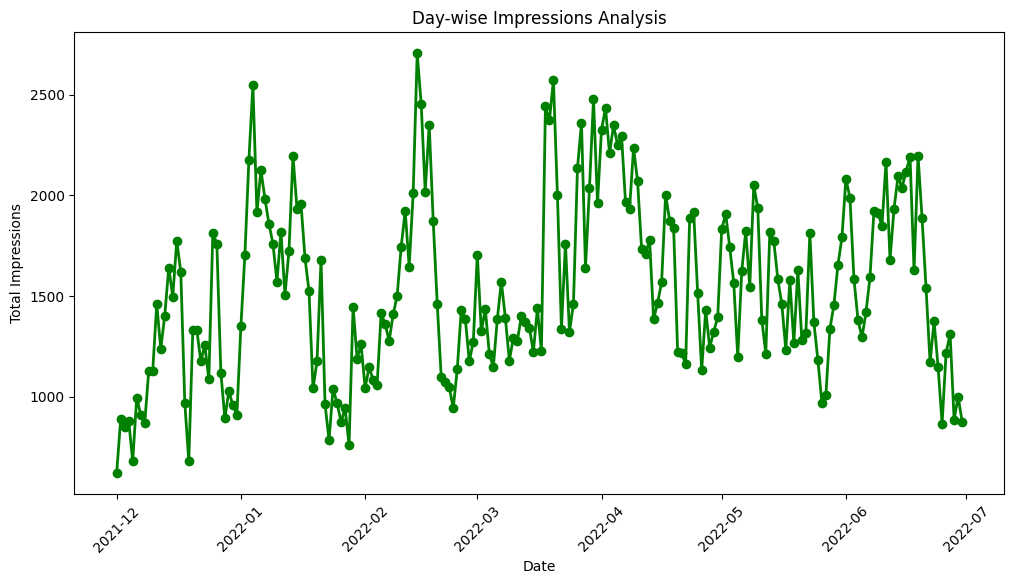

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(daily_impressions.index, daily_impressions.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Day-wise Impressions Analysis')
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.show()

####Impressions peaked in february month and least impressions are in December

##Day-wise Total Analysis (Quantity, Clicks, and Impressions)

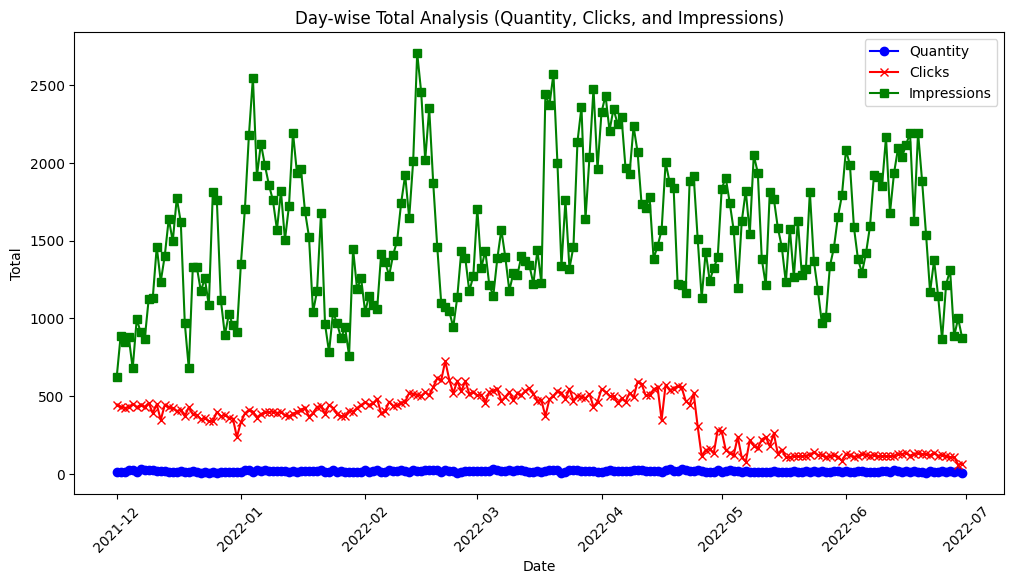

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_total.index, daily_total['Quantity'], label='Quantity', color='blue', marker='o')
plt.plot(daily_total.index, daily_total['Clicks'], label='Clicks', color='red', marker='x')
plt.plot(daily_total.index, daily_total['Impressions'], label='Impressions', color='green', marker='s')
plt.title('Day-wise Total Analysis (Quantity, Clicks, and Impressions)')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##WEEKDAYS ANALYSIS

###Weekday-wise Quantity Analysis

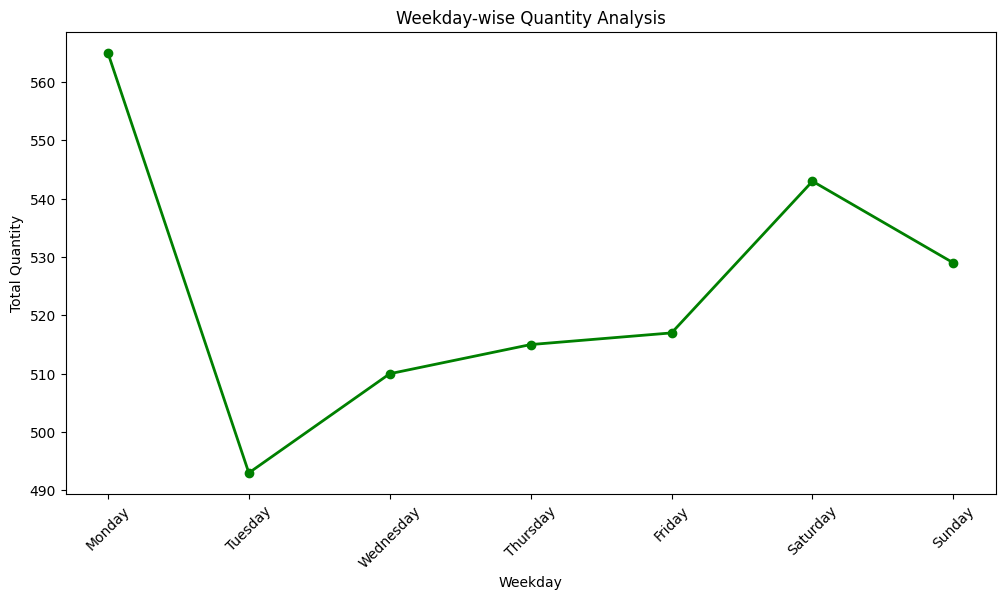

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(weekday_quantity.index, weekday_quantity.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Weekday-wise Quantity Analysis')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


###Sales peak on Saturday, indicating higher shopping activity during the weekend and Sales are lowest on Thursday, suggesting lower consumer engagement during the mid-week.

##WEEKDAY AND WEEKEND SALES COMPARISION

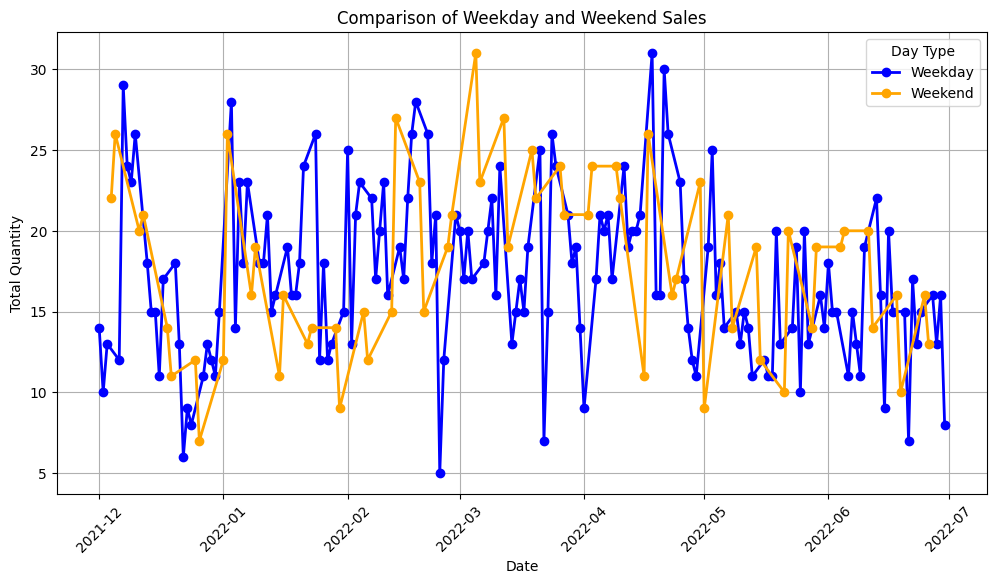

Weekday Sales: 2600.0
Weekend Sales: 1072.0


In [128]:
# Add a new column 'Weekday' to categorize the days
merged_data['Weekday'] = merged_data['Day Index'].dt.dayofweek

# Create a new column to categorize into 'Weekday' and 'Weekend'
merged_data['Day Type'] = merged_data['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by 'Day Type' and Day Index, then sum the Quantity
day_type_quantity = merged_data.groupby(['Day Type', 'Day Index'])['Quantity'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_data = day_type_quantity[day_type_quantity['Day Type'] == 'Weekday']
weekend_data = day_type_quantity[day_type_quantity['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_data['Day Index'], weekday_data['Quantity'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_data['Day Index'], weekend_data['Quantity'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_sales = day_type_quantity[day_type_quantity['Day Type'] == 'Weekday']['Quantity'].sum()
weekend_sales = day_type_quantity[day_type_quantity['Day Type'] == 'Weekend']['Quantity'].sum()
print(f"Weekday Sales: {weekday_sales}")
print(f"Weekend Sales: {weekend_sales}")



####Weekend sales show more variability, with some peaks indicating high sales on certain weekends.

##Comparison of Weekday and Weekend Clicks

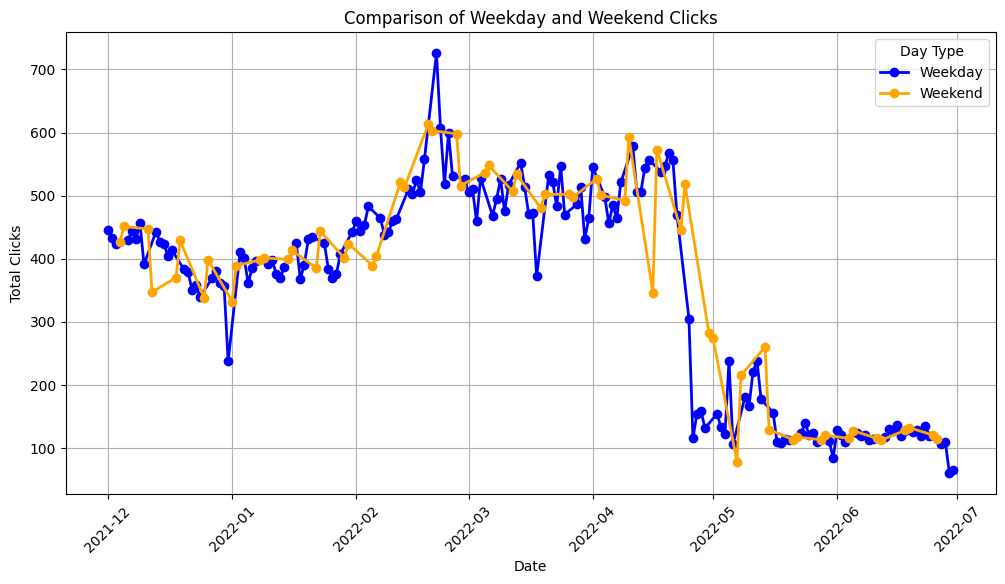

Weekday Clicks: 53822
Weekend Clicks: 22117


In [129]:
# Group by 'Day Type' and Day Index, then sum the Clicks
day_type_clicks = merged_data.groupby(['Day Type', 'Day Index'])['Clicks'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_clicks = day_type_clicks[day_type_clicks['Day Type'] == 'Weekday']
weekend_clicks = day_type_clicks[day_type_clicks['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_clicks['Day Index'], weekday_clicks['Clicks'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_clicks['Day Index'], weekend_clicks['Clicks'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Clicks')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_clicks_total = day_type_clicks[day_type_clicks['Day Type'] == 'Weekday']['Clicks'].sum()
weekend_clicks_total = day_type_clicks[day_type_clicks['Day Type'] == 'Weekend']['Clicks'].sum()
print(f"Weekday Clicks: {weekday_clicks_total}")
print(f"Weekend Clicks: {weekend_clicks_total}")


####Weekday clicks are higher overall compared to weekend clicks.

##Comparison of Weekday and Weekend Impressions

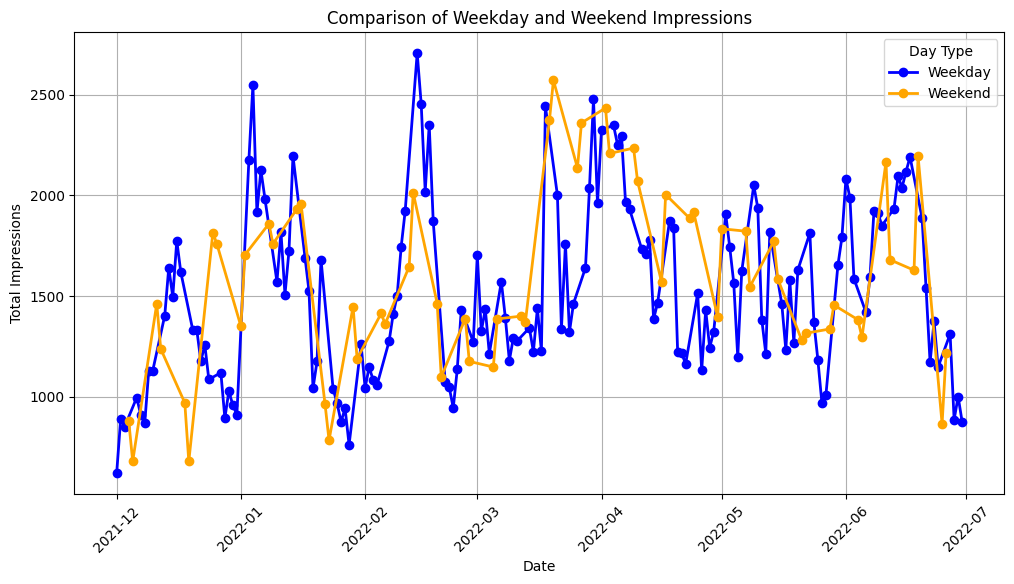

Weekday Impressions: 229914
Weekend Impressions: 94807


In [41]:
# Group by 'Day Type' and Day Index, then sum the Impressions
day_type_impressions = merged_data.groupby(['Day Type', 'Day Index'])['Impressions'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_impressions = day_type_impressions[day_type_impressions['Day Type'] == 'Weekday']
weekend_impressions = day_type_impressions[day_type_impressions['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_impressions['Day Index'], weekday_impressions['Impressions'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_impressions['Day Index'], weekend_impressions['Impressions'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Impressions')
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_impressions_total = day_type_impressions[day_type_impressions['Day Type'] == 'Weekday']['Impressions'].sum()
weekend_impressions_total = day_type_impressions[day_type_impressions['Day Type'] == 'Weekend']['Impressions'].sum()
print(f"Weekday Impressions: {weekday_impressions_total}")
print(f"Weekend Impressions: {weekend_impressions_total}")


####Weekday impressions are higher, suggesting more visibility during weekdays.

##MONTH WISE ANALYSIS

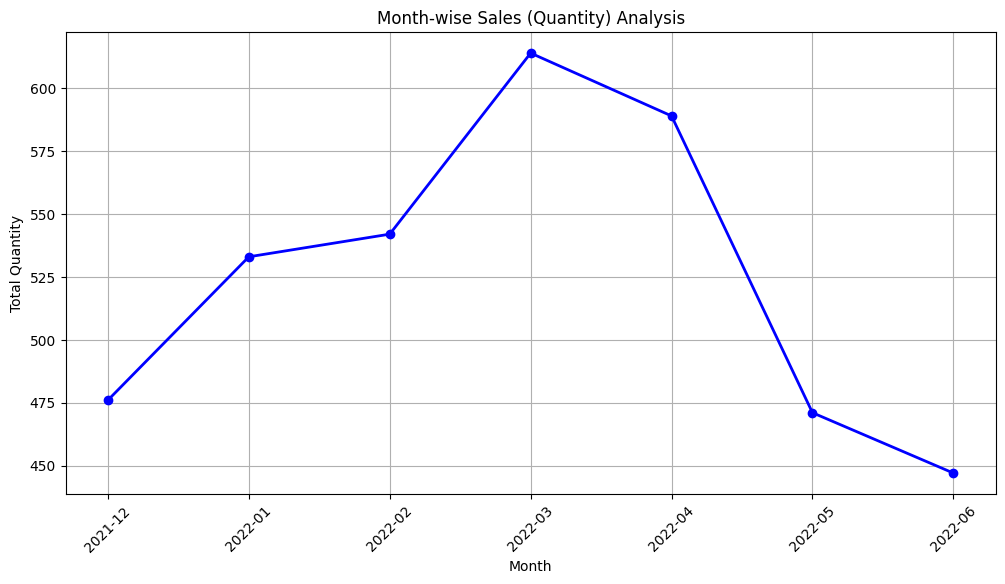

Sales peaked in 2022-03.
Sales were lowest in 2022-06.


In [42]:
# Extract the month and year from the 'Day Index'
merged_data['Month'] = merged_data['Day Index'].dt.to_period('M')

# Group by Month and sum the Quantity
month_quantity = merged_data.groupby('Month')['Quantity'].sum().reset_index()

# Plot the month-wise sales
plt.figure(figsize=(12, 6))
plt.plot(month_quantity['Month'].astype(str), month_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Month-wise Sales (Quantity) Analysis')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_quantity_month = month_quantity.loc[month_quantity['Quantity'].idxmax()]['Month']
min_quantity_month = month_quantity.loc[month_quantity['Quantity'].idxmin()]['Month']
print(f"Sales peaked in {max_quantity_month}.")
print(f"Sales were lowest in {min_quantity_month}.")


##Month-wise Analysis of Clicks

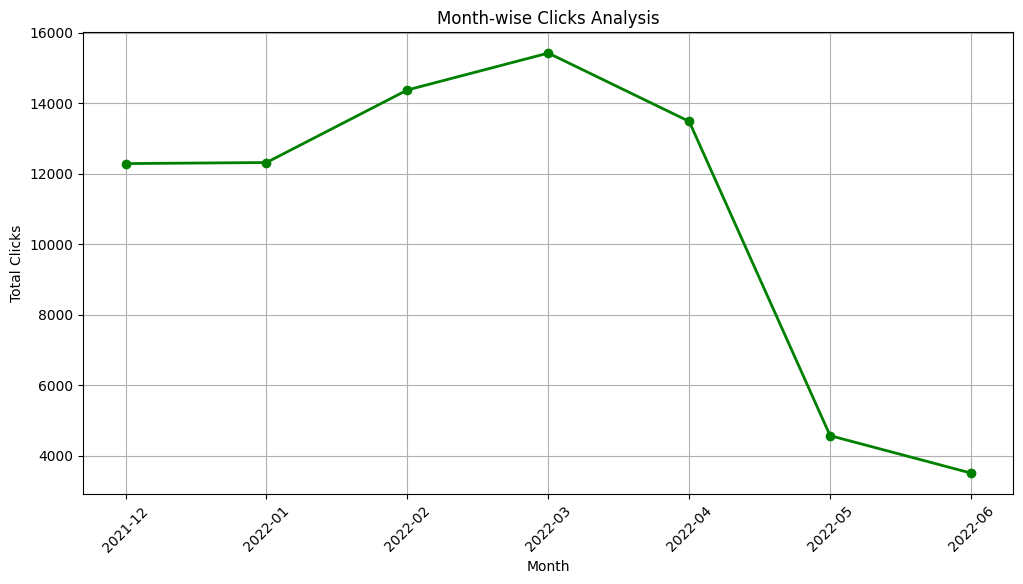

Clicks peaked in 2022-03.
Clicks were lowest in 2022-06.


In [132]:
# Group by Month and sum the Clicks
month_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the month-wise clicks
plt.figure(figsize=(12, 6))
plt.plot(month_clicks['Month'].astype(str), month_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Month-wise Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_clicks_month = month_clicks.loc[month_clicks['Clicks'].idxmax()]['Month']
min_clicks_month = month_clicks.loc[month_clicks['Clicks'].idxmin()]['Month']
print(f"Clicks peaked in {max_clicks_month}.")
print(f"Clicks were lowest in {min_clicks_month}.")


##Month-wise Analysis of Impressions

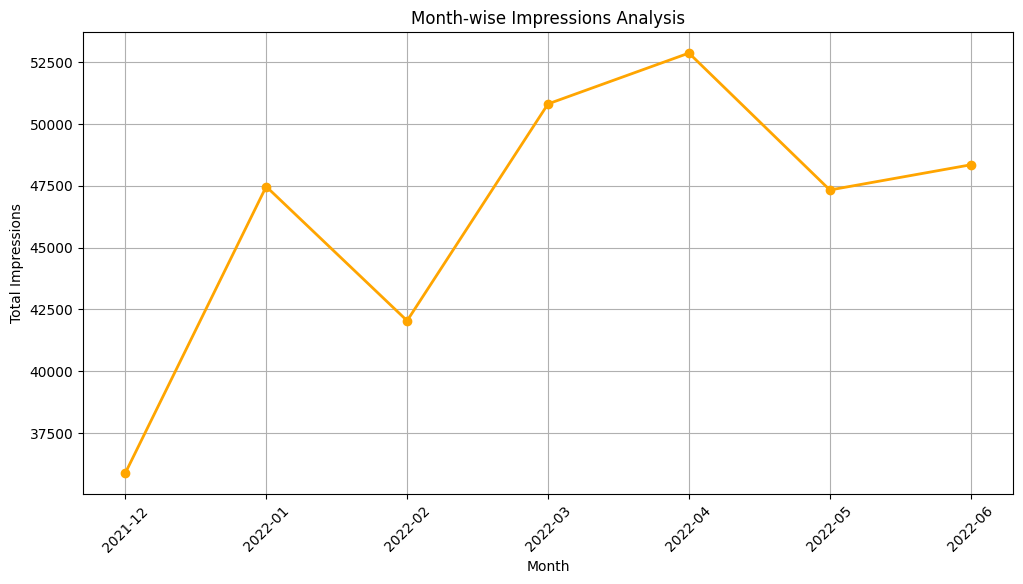

Impressions peaked in 2022-04.
Impressions were lowest in 2021-12.


In [133]:
# Group by Month and sum the Impressions
month_impressions = merged_data.groupby('Month')['Impressions'].sum().reset_index()

# Plot the month-wise impressions
plt.figure(figsize=(12, 6))
plt.plot(month_impressions['Month'].astype(str), month_impressions['Impressions'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Month-wise Impressions Analysis')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_impressions_month = month_impressions.loc[month_impressions['Impressions'].idxmax()]['Month']
min_impressions_month = month_impressions.loc[month_impressions['Impressions'].idxmin()]['Month']
print(f"Impressions peaked in {max_impressions_month}.")
print(f"Impressions were lowest in {min_impressions_month}.")


##Quarter wise analysis

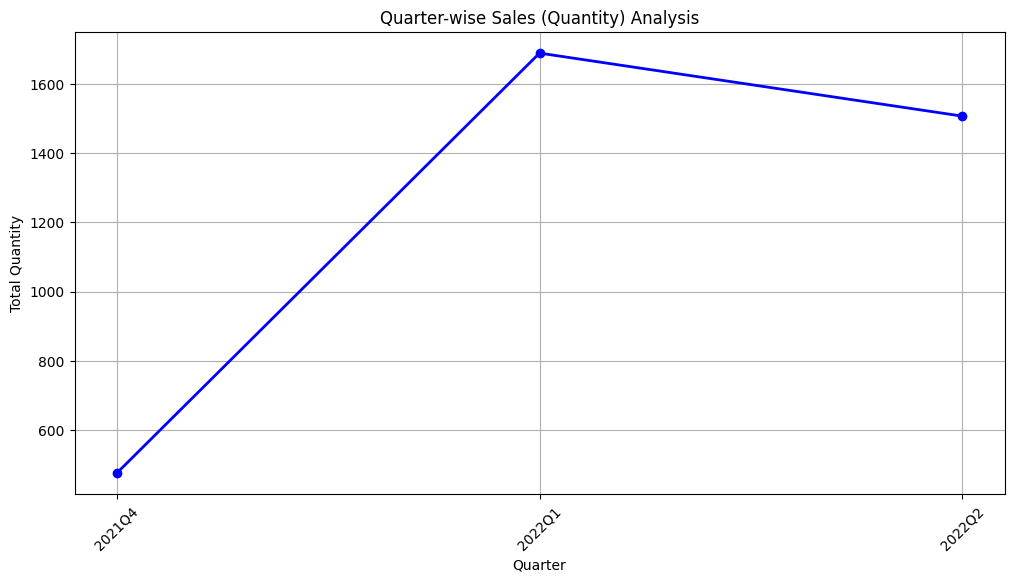

Sales peaked in 2022Q1.
Sales were lowest in 2021Q4.


In [135]:
# Extract the quarter from the 'Day Index'
merged_data['Quarter'] = merged_data['Day Index'].dt.to_period('Q')

# Group by Quarter and sum the Quantity
quarter_quantity = merged_data.groupby('Quarter')['Quantity'].sum().reset_index()

# Plot the quarter-wise sales
plt.figure(figsize=(12, 6))
plt.plot(quarter_quantity['Quarter'].astype(str), quarter_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Quarter-wise Sales (Quantity) Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_quantity_quarter = quarter_quantity.loc[quarter_quantity['Quantity'].idxmax()]['Quarter']
min_quantity_quarter = quarter_quantity.loc[quarter_quantity['Quantity'].idxmin()]['Quarter']
print(f"Sales peaked in {max_quantity_quarter}.")
print(f"Sales were lowest in {min_quantity_quarter}.")


##Quarter-wise Clicks Analysis

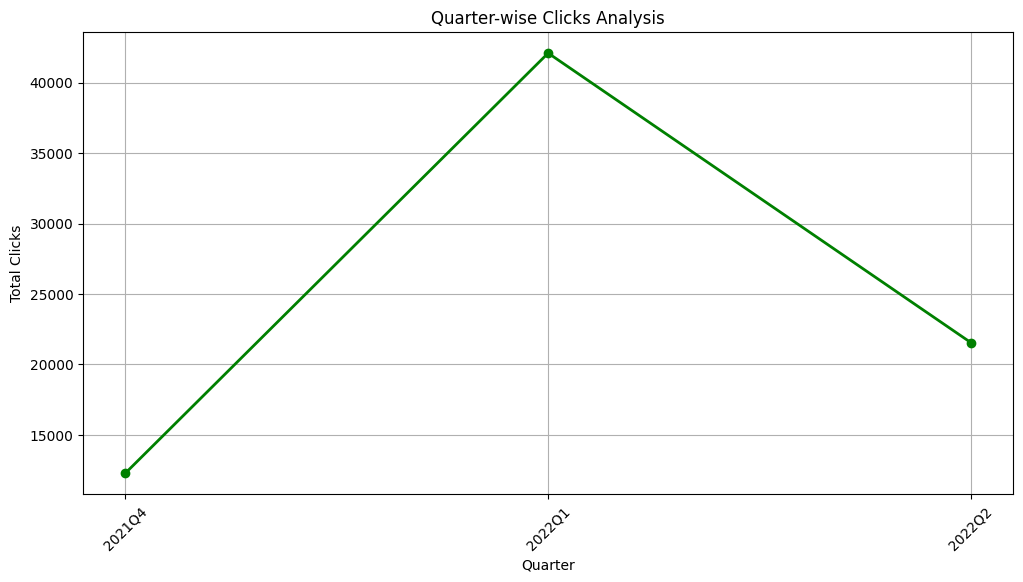

Clicks peaked in 2022Q1.
Clicks were lowest in 2021Q4.


In [136]:
# Group by Quarter and sum the Clicks
quarter_clicks = merged_data.groupby('Quarter')['Clicks'].sum().reset_index()

# Plot the quarter-wise clicks
plt.figure(figsize=(12, 6))
plt.plot(quarter_clicks['Quarter'].astype(str), quarter_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Quarter-wise Clicks Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_clicks_quarter = quarter_clicks.loc[quarter_clicks['Clicks'].idxmax()]['Quarter']
min_clicks_quarter = quarter_clicks.loc[quarter_clicks['Clicks'].idxmin()]['Quarter']
print(f"Clicks peaked in {max_clicks_quarter}.")
print(f"Clicks were lowest in {min_clicks_quarter}.")


##Quarter-wise Impressions Analysis

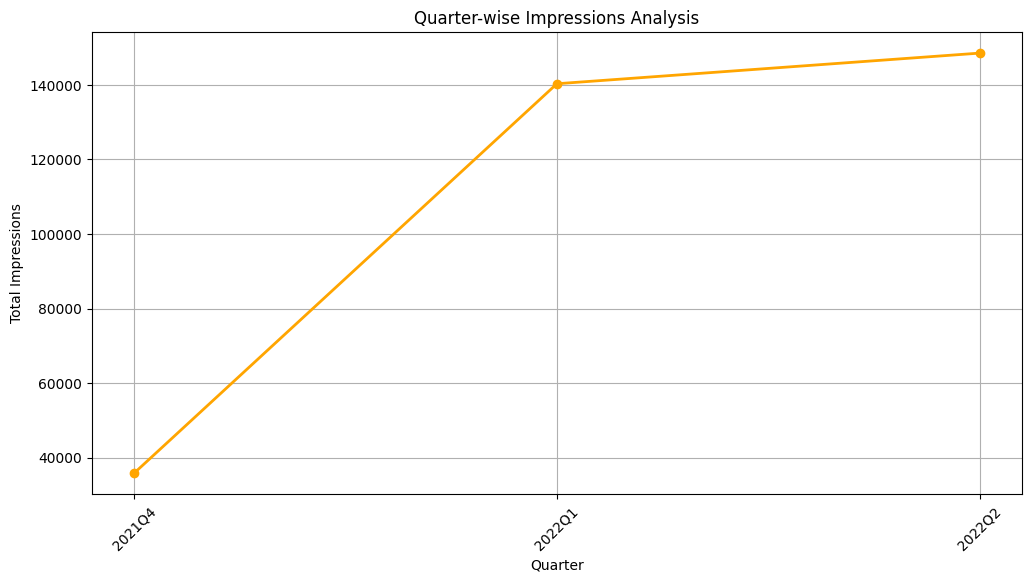

Impressions peaked in 2022Q2.
Impressions were lowest in 2021Q4.


In [137]:
# Group by Quarter and sum the Impressions
quarter_impressions = merged_data.groupby('Quarter')['Impressions'].sum().reset_index()

# Plot the quarter-wise impressions
plt.figure(figsize=(12, 6))
plt.plot(quarter_impressions['Quarter'].astype(str), quarter_impressions['Impressions'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Quarter-wise Impressions Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_impressions_quarter = quarter_impressions.loc[quarter_impressions['Impressions'].idxmax()]['Quarter']
min_impressions_quarter = quarter_impressions.loc[quarter_impressions['Impressions'].idxmin()]['Quarter']
print(f"Impressions peaked in {max_impressions_quarter}.")
print(f"Impressions were lowest in {min_impressions_quarter}.")


##Monthly Sales (Quantity) Analysis

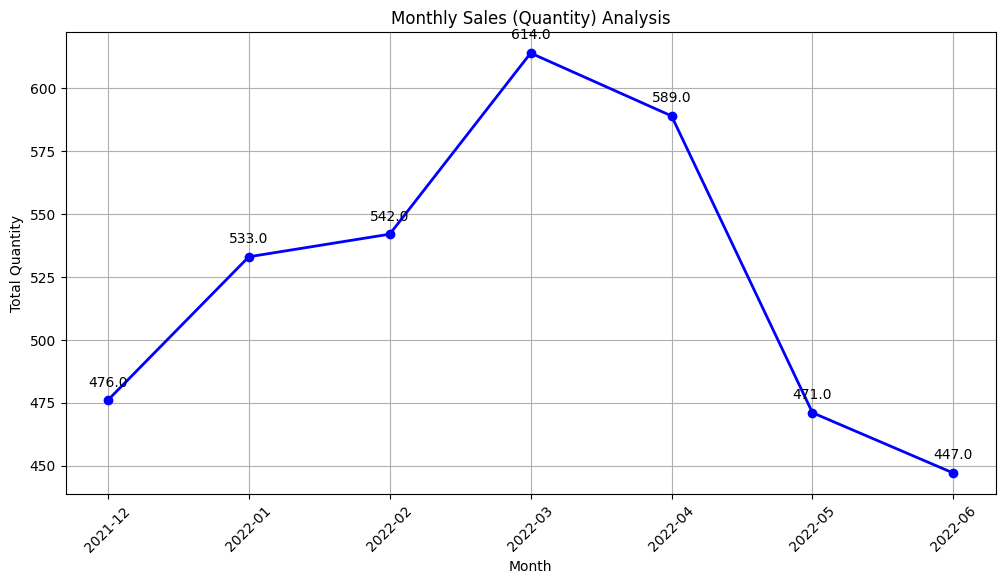

In [139]:
# Group by Month and sum the Quantity
monthly_quantity = merged_data.groupby('Month')['Quantity'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_quantity['Month'].astype(str), monthly_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Monthly Sales (Quantity) Analysis')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_quantity)):
    plt.annotate(str(monthly_quantity['Quantity'][i]), 
                 xy=(monthly_quantity['Month'][i].strftime('%Y-%m'), monthly_quantity['Quantity'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



##Monthly Clicks Analysis

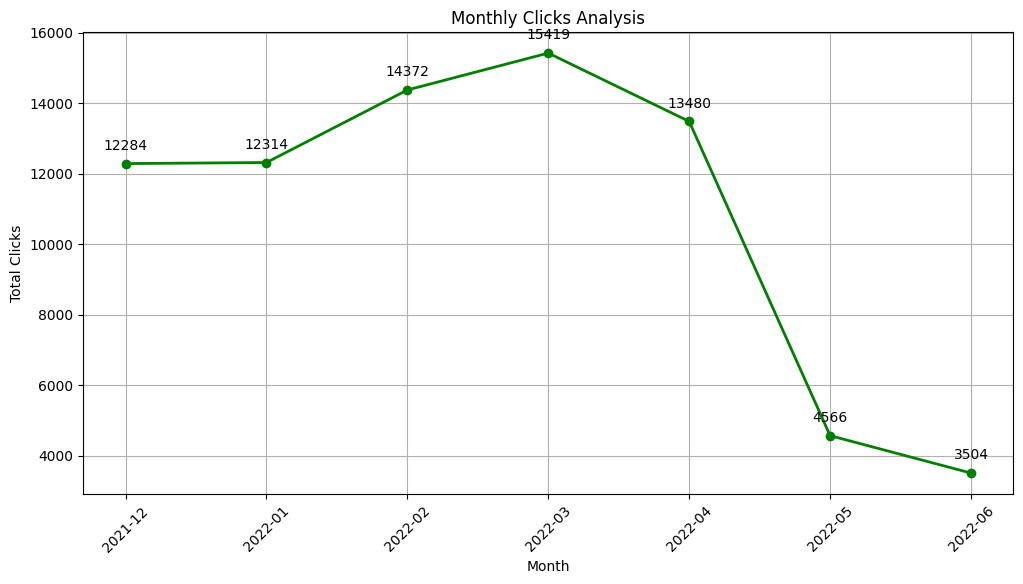

In [140]:
# Group by Month and sum the Clicks
monthly_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the monthly clicks
plt.figure(figsize=(12, 6))
plt.plot(monthly_clicks['Month'].astype(str), monthly_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_clicks)):
    plt.annotate(str(monthly_clicks['Clicks'][i]), 
                 xy=(monthly_clicks['Month'][i].strftime('%Y-%m'), monthly_clicks['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


##Monthly Clicks Analysis

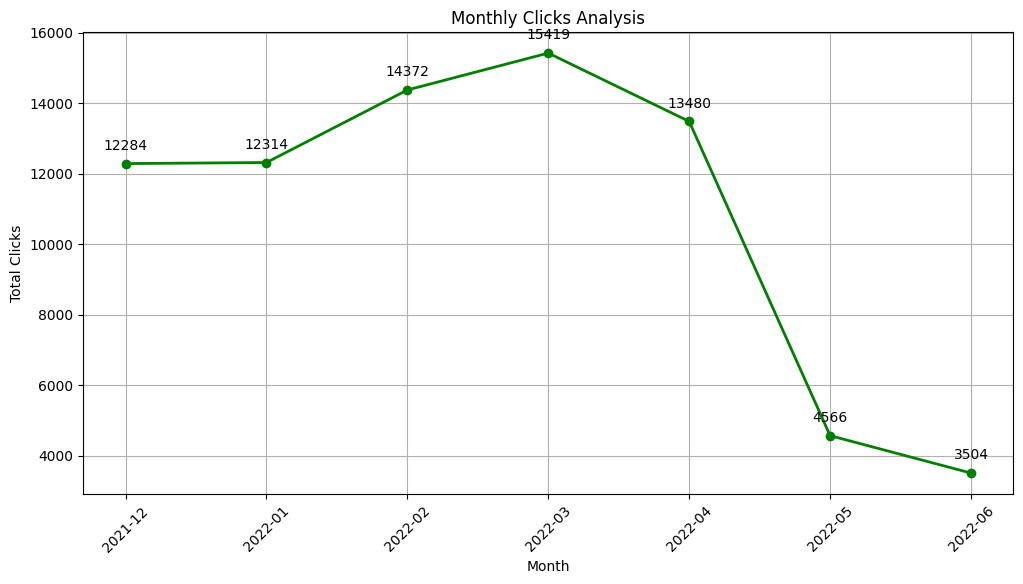

In [141]:
# Group by Month and sum the Clicks
monthly_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the monthly clicks
plt.figure(figsize=(12, 6))
plt.plot(monthly_clicks['Month'].astype(str), monthly_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_clicks)):
    plt.annotate(str(monthly_clicks['Clicks'][i]), 
                 xy=(monthly_clicks['Month'][i].strftime('%Y-%m'), monthly_clicks['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


##Monthly Trends for Sales (Quantity), Clicks, and Impressions

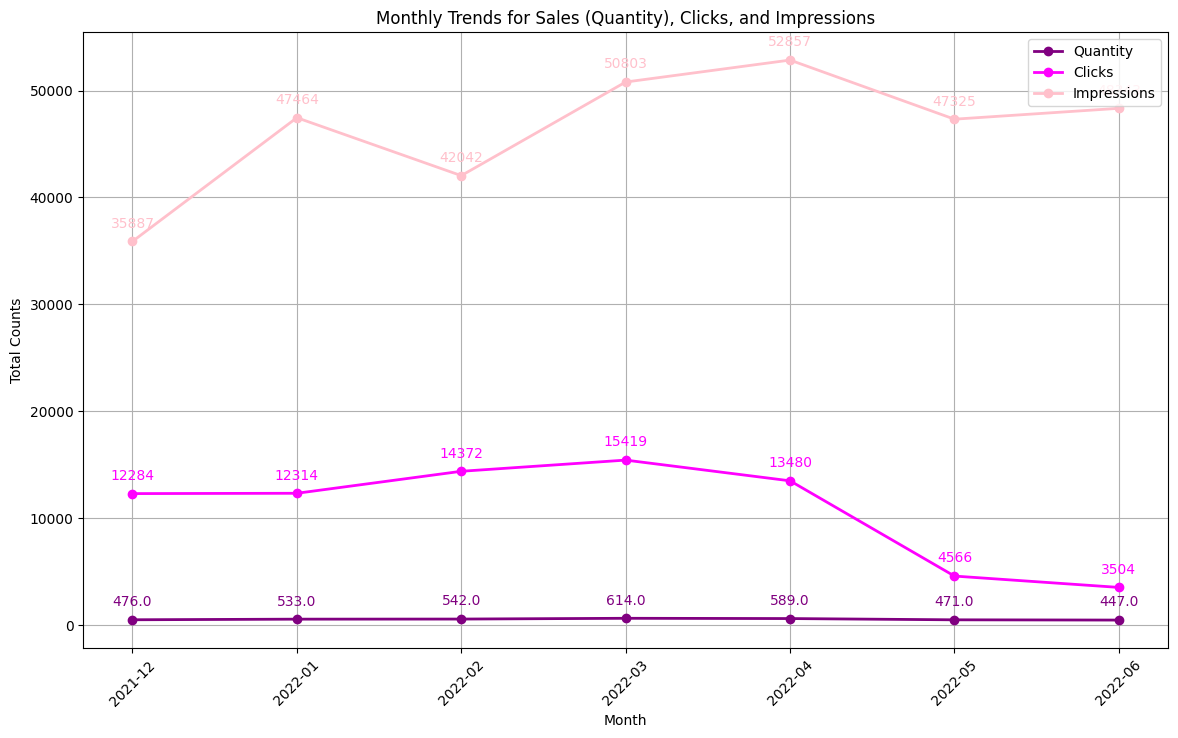

In [ ]:
# Group by Month and sum the Quantity, Clicks, and Impressions
monthly_data = merged_data.groupby('Month').sum().reset_index()

# Plot the monthly trends
plt.figure(figsize=(14, 8))

# Plot for Quantity
plt.plot(monthly_data['Month'].astype(str), monthly_data['Quantity'], marker='o', color='purple', linestyle='-', linewidth=2, label='Quantity')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Quantity'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Quantity'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='purple')

# Plot for Clicks
plt.plot(monthly_data['Month'].astype(str), monthly_data['Clicks'], marker='o', color='magenta', linestyle='-', linewidth=2, label='Clicks')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Clicks'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='magenta')

# Plot for Impressions
plt.plot(monthly_data['Month'].astype(str), monthly_data['Impressions'], marker='o', color='pink', linestyle='-', linewidth=2, label='Impressions')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Impressions'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Impressions'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='pink')

plt.title('Monthly Trends for Sales (Quantity), Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



#Week 3

#Time Series Modelling 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
# Replace 'your_data_file.csv' with the path to your data file
merged_data = pd.read_csv('final_dataset.csv')
merged_data.head()



Day Index  Quantity  Clicks  Impressions  Imputed_Quantity  log_quantity  \
0  2021-12-01      14.0     445          620              14.0      2.708050   
1  2021-12-02      10.0     433          890              10.0      2.397895   
2  2021-12-03      13.0     424          851              13.0      2.639057   
3  2021-12-04      22.0     427          881              22.0      3.135494   
4  2021-12-05      26.0     451          678              26.0      3.295837   

   log_clicks  log_impressions  Month  Year  ... March April  May  June  July  \
0    6.100319         6.431331     12  2021  ...     0     0    0     0     0   
1    6.073045         6.792344     12  2021  ...     0     0    0     0     0   
2    6.052089         6.747587     12  2021  ...     0     0    0     0     0   
3    6.059123         6.782192     12  2021  ...     0     0    0     0     0   
4    6.113682         6.520621     12  2021  ...     0     0    0     0     0   

   August  September  October  November  December  
0       0          0        0         0         1  
1       0          0        0         0         1  
2       0          0        0         0         1  
3       0          0        0         0         1  
4       0          0        0         0         1  

[5 rows x 36 columns]

#Data Preprocessing

##Stationarity Check

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming merged_data is already loaded and indexed by 'Day Index'
# Check stationarity using ADF test
result = adfuller(merged_data['Quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation of results
if result[1] > 0.05:
    print("The series is non-stationary.")
else:
    print("The series is stationary.")


ADF Statistic: -4.376515966221694
p-value: 0.0003265641084249276
Critical Values: {'1%': -3.4621857592784546, '5%': -2.875537986778846, '10%': -2.574231080806213}
The series is stationary.


###Train-Test Split

In [8]:
# 70-30 train-test split
split_ratio = 0.7
split_point = int(len(merged_data) * split_ratio)
train_data = merged_data[:split_point]
test_data = merged_data[split_point:]

print(f'Training Data Length: {len(train_data)}')
print(f'Test Data Length: {len(test_data)}')


Training Data Length: 148
Test Data Length: 64


In [9]:
# Define the train and test datasets for the target (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))

train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]


In [10]:
# Helper function for plotting with custom axis scaling and displaying metrics
def plot_model_predictions(true_values, predicted_values, model_name, metrics):
    plt.figure(figsize=(12, 6))
    
    # Plot true values (Imputed_Quantity) from the test set
    plt.plot(true_values.index, true_values, label='True values', color='blue')  # True values in blue
    
    # Plot the predicted values from the AR model
    plt.plot(true_values.index, predicted_values, label=f'{model_name} Predictions', color='darkgreen')  # Predictions in dark green
    
    # Labeling the axes and the plot
    plt.legend()
    plt.title(f'{model_name} Model Predictions')
    plt.xlabel('Date')  # Label X-axis as Date (Day Index)
    plt.ylabel('Imputed Quantity')  # Label Y-axis as Imputed Quantity
    plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
    
    # Adjust the axis scaling to match the previous approach
    plt.ylim([0, max(true_values.max(), predicted_values.max()) + 5])  # Adjust Y-axis scaling for better comparison
    plt.tight_layout()  # Ensure the plot fits within the figure area
    plt.show()

    # Display model metrics below the plot
    print(f'{model_name} Model Evaluation Metrics:')
    print(f'MAE (Mean Absolute Error): {metrics[0]:.2f}')
    print(f'RMSE (Root Mean Squared Error): {metrics[1]:.2f}')
    print(f'MSE (Mean Squared Error): {metrics[2]:.2f}')
    print(f'MAPE (Mean Absolute Percentage Error): {metrics[3]:.2f}%')


#AR Model

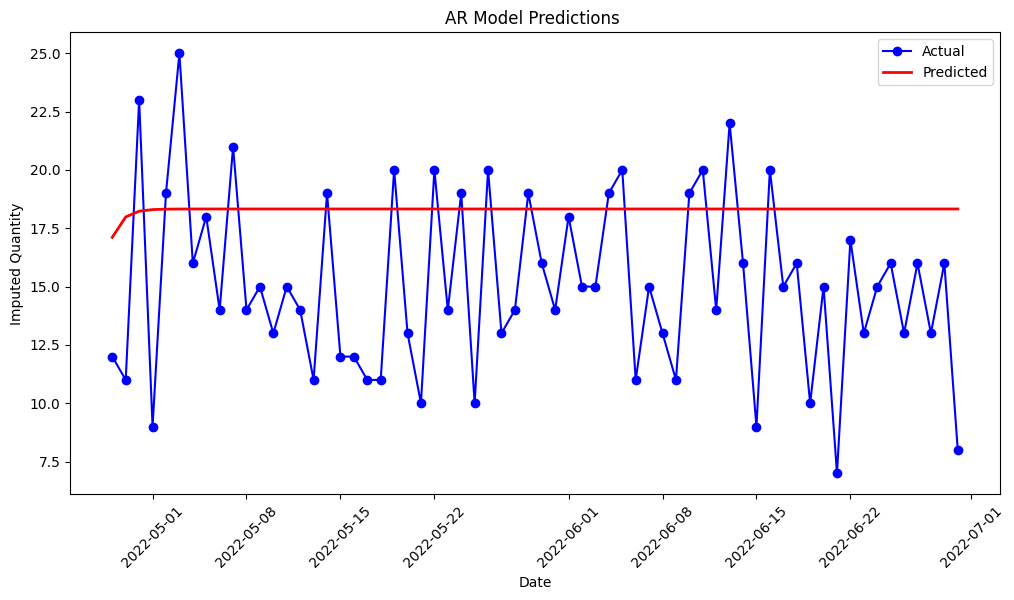

RMSE: 5.008219453828646
MAE: 4.233923803992548
MAPE: 34.91184223084975%
MSE: 25.082262097707705


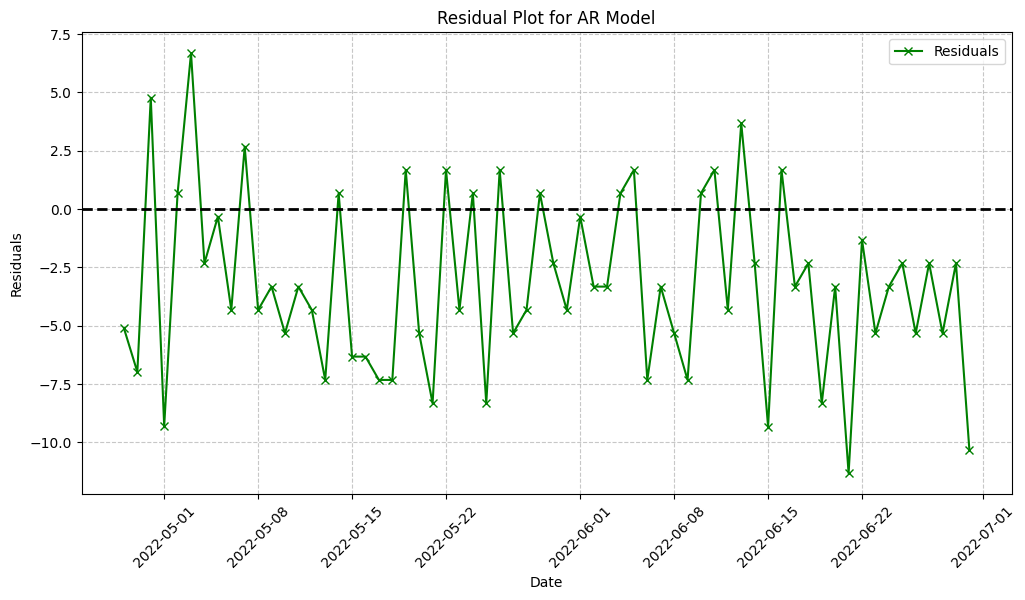

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming merged_data is already loaded and indexed by 'Day Index'
# Convert 'Day Index' to datetime (if it's not already)
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Choose the lag (based on prior analysis, e.g., lag=1)
lag = 1  # You can adjust this based on your preference or findings

# Fit the AR model with the selected lag
model_ar = AutoReg(train, lags=lag)
model_ar_fitted = model_ar.fit()

# Make predictions on the test set
predictions_ar = model_ar_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the predictions vs actual values using Date for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_ar, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('AR Model Predictions ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Evaluation metrics

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions_ar))
print(f'RMSE: {rmse}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, predictions_ar)
print(f'MAE: {mae}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - predictions_ar) / test)) * 100
print(f'MAPE: {mape}%')

# MSE (Mean Squared Error)
mse = mean_squared_error(test, predictions_ar)
print(f'MSE: {mse}')

# Residuals Plot
residuals = test - predictions_ar  # Calculate residuals

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title('Residual Plot for AR Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


####1.Performance of model is poor

#Hyperparameter Tuning For AR Model

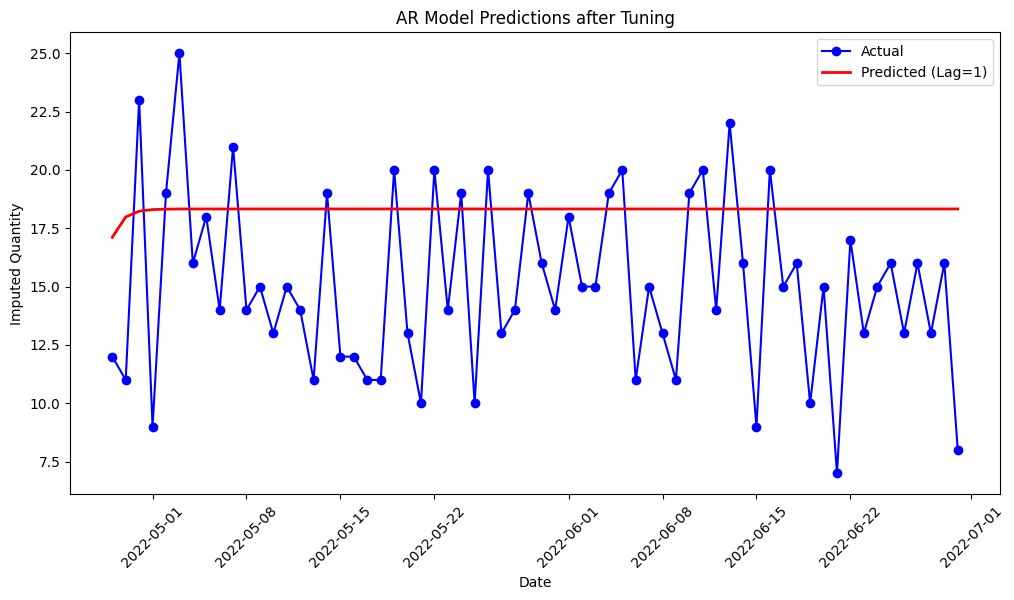

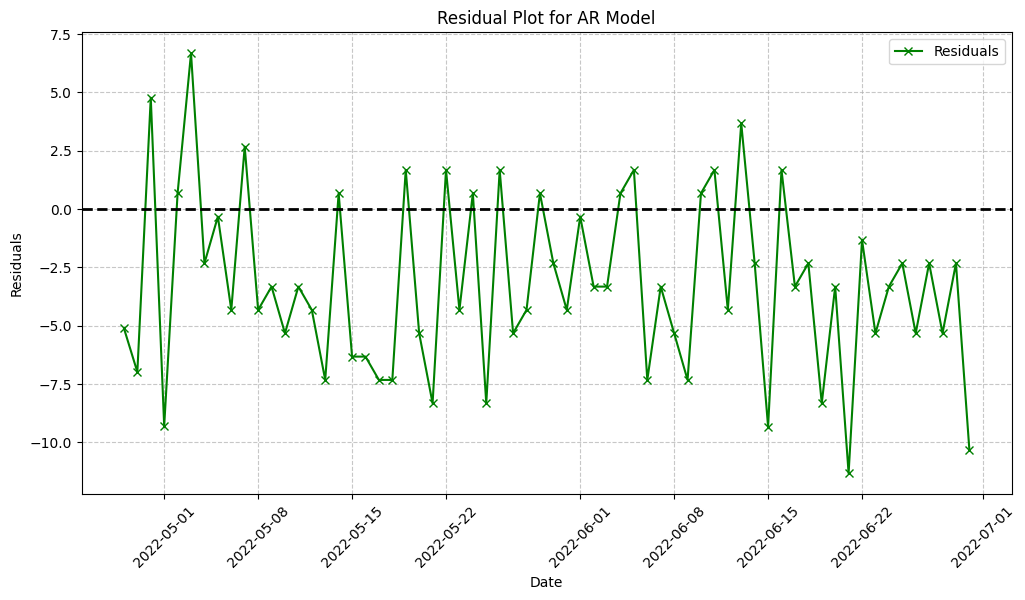

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product

# Assuming merged_data is already loaded and indexed by 'Day Index'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# 1. Hyperparameter Tuning for AR Model (AutoReg)
# Try different lags for the AR model (you can increase the range as needed)
lag_range = [1, 2, 3, 4, 5]
best_rmse_ar = float('inf')
best_lag_ar = None
best_predictions_ar = None

for lag in lag_range:
    model_ar = AutoReg(train, lags=lag)
    model_ar_fitted = model_ar.fit()
    predictions_ar = model_ar_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    
    rmse = np.sqrt(mean_squared_error(test, predictions_ar))
    if rmse < best_rmse_ar:
        best_rmse_ar = rmse
        best_lag_ar = lag
        best_predictions_ar = predictions_ar

# Plot AR model predictions with the best lag
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], best_predictions_ar, label=f'Predicted (Lag={best_lag_ar})', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('AR Model Predictions after Tuning')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Residuals for AR Model
residuals_ar = test - best_predictions_ar  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_ar, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title('Residual Plot for AR Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

####No change in the prediction even after performing th tuning.

#MA(Moving Average) Model

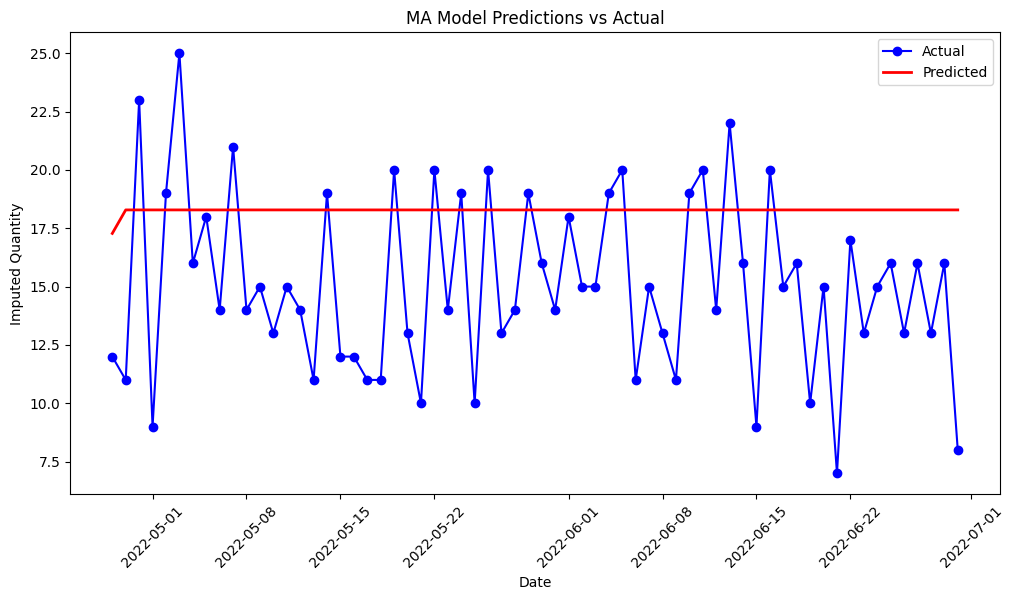

RMSE: 4.992306983557771
MAE: 4.220961230552136
MAPE: 34.79604707624146%
MSE: 24.923129018079692


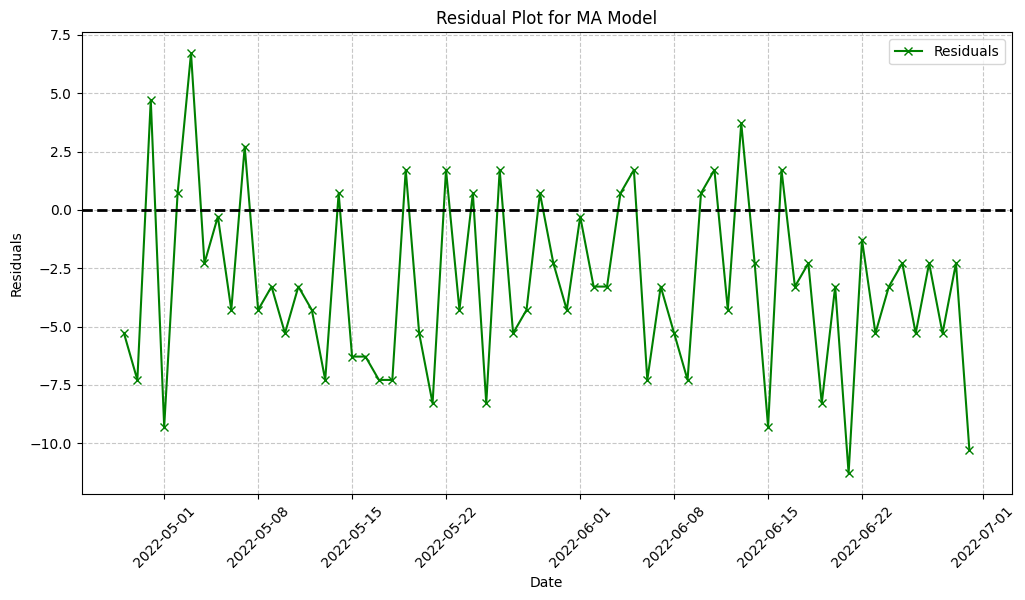

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming merged_data is already loaded and indexed by 'Day Index'
# Convert 'Day Index' to datetime (if it's not already)
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Choose the MA order (based on prior analysis, e.g., order=1)
order = (0, 0, 1)  # (p, d, q) where p=AR, d=differencing, q=MA

# Fit the MA model using ARIMA (since ARIMA includes both AR and MA components)
model_ma = ARIMA(train, order=order)
model_ma_fitted = model_ma.fit()

# Make predictions on the test set
predictions_ma = model_ma_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the predictions vs actual values using Date for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_ma, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('MA Model Predictions vs Actual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Evaluation metrics

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions_ma))
print(f'RMSE: {rmse}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, predictions_ma)
print(f'MAE: {mae}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - predictions_ma) / test)) * 100
print(f'MAPE: {mape}%')

# MSE (Mean Squared Error)
mse = mean_squared_error(test, predictions_ma)
print(f'MSE: {mse}')

# Residuals Plot
residuals = test - predictions_ma  # Calculate residuals

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title('Residual Plot for MA Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


####Model performance is poor

##HyperParameter Tuning for MA Model

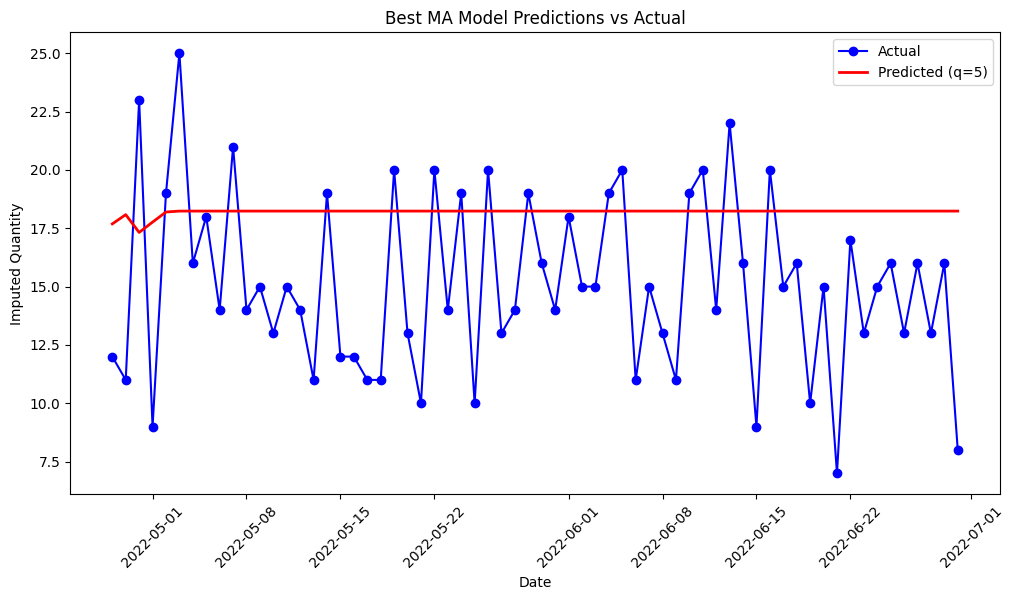

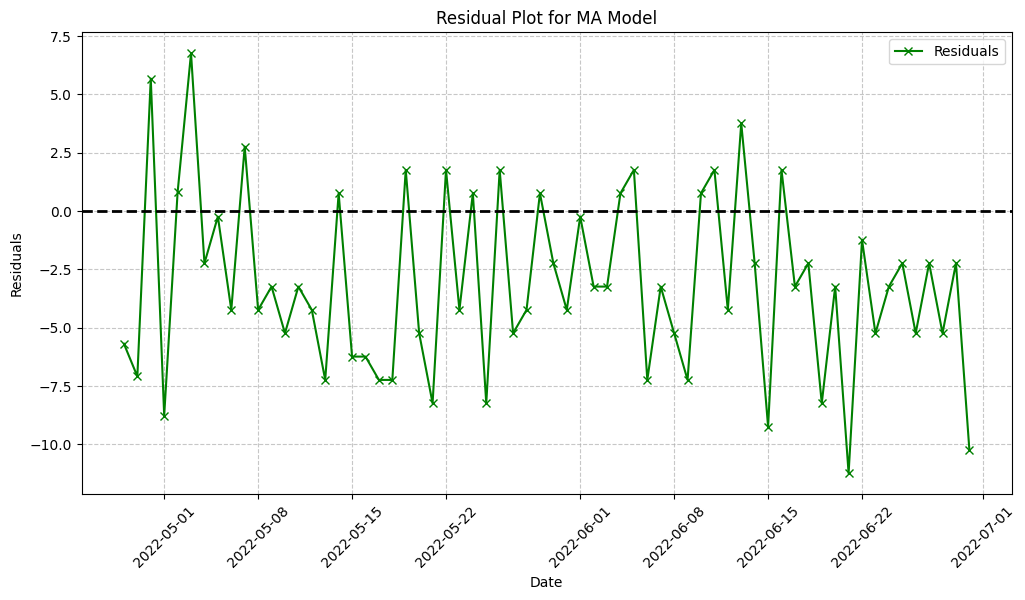

In [63]:
q_range = [1, 2, 3, 4, 5]
best_rmse_ma = float('inf')
best_q_ma = None
best_predictions_ma = None

for q in q_range:
    model_ma = ARIMA(train, order=(0, 0, q))  # p=0 (AR), d=0 (differencing), q varies
    model_ma_fitted = model_ma.fit()
    predictions_ma = model_ma_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    
    rmse = np.sqrt(mean_squared_error(test, predictions_ma))
    if rmse < best_rmse_ma:
        best_rmse_ma = rmse
        best_q_ma = q
        best_predictions_ma = predictions_ma

# Plot MA model predictions with the best q
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], best_predictions_ma, label=f'Predicted (q={best_q_ma})', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('Best MA Model Predictions vs Actual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Residuals for MA Model
residuals_ma = test - best_predictions_ma  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_ma, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title('Residual Plot for MA Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#ARIMA Model

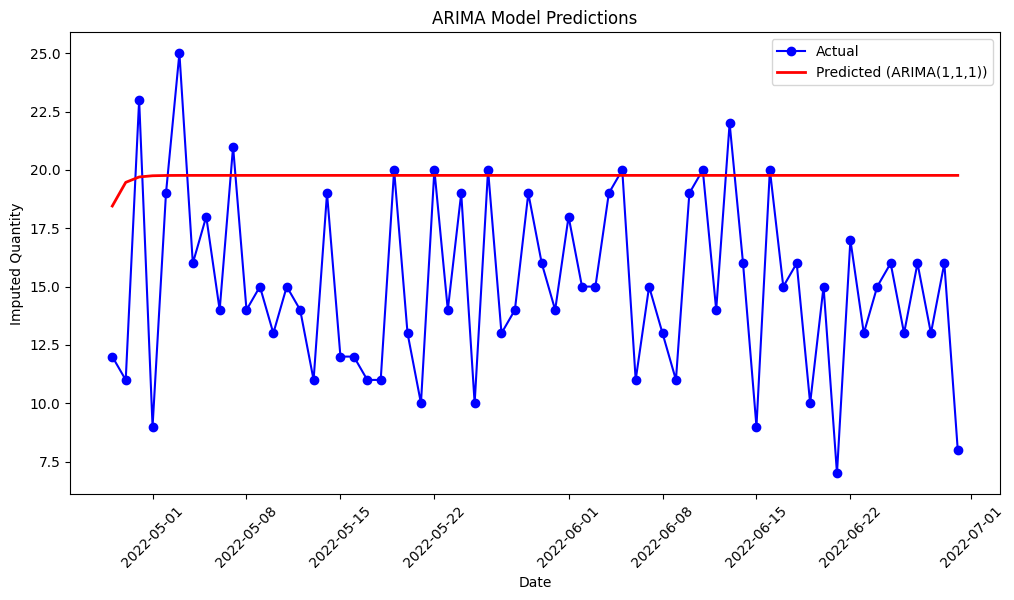

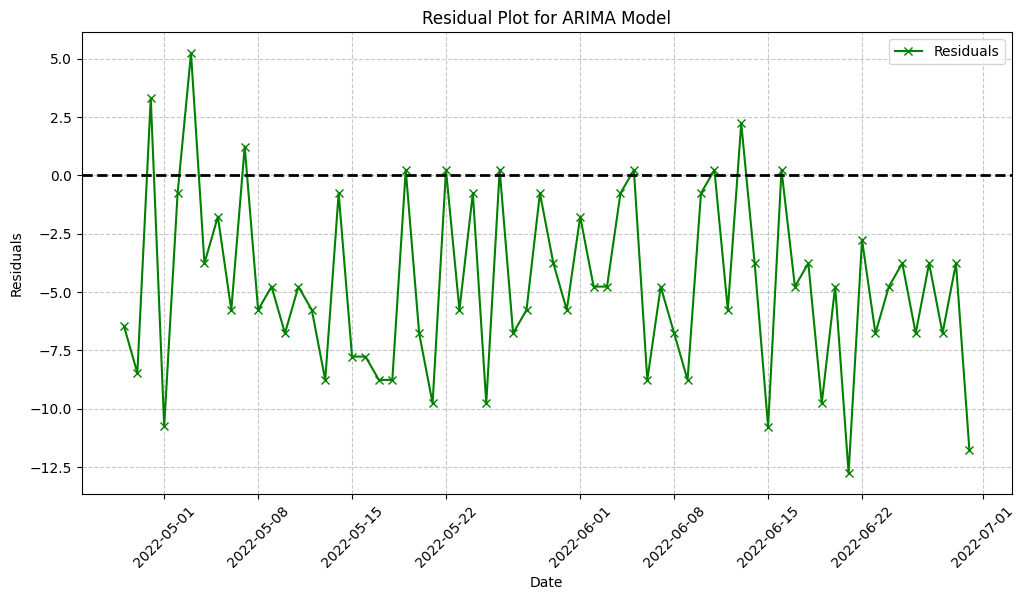

ARIMA Model (p=1, d=1, q=1) Metrics:
RMSE: 6.0386442108001415
MAE: 5.095810829003167
MAPE: 42.34430801127399%
MSE: 36.465223904630065


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming merged_data is already loaded and indexed by 'Day Index'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Define the p, d, q parameters for ARIMA (initial values for demonstration)
p, d, q = 1, 1, 1  # These values can be adjusted based on further analysis

# Fit the ARIMA model
model_arima = ARIMA(train, order=(p, d, q))
model_arima_fitted = model_arima.fit()

# Make predictions on the test set
predictions_arima = model_arima_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot ARIMA model predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_arima, label=f'Predicted (ARIMA({p},{d},{q}))', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title(f'ARIMA Model Predictions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Residuals for ARIMA Model
residuals_arima = test - predictions_arima  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_arima, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title(f'Residual Plot for ARIMA Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Evaluation metrics for the ARIMA model
rmse_arima = np.sqrt(mean_squared_error(test, predictions_arima))
mae_arima = mean_absolute_error(test, predictions_arima)
mape_arima = np.mean(np.abs((test - predictions_arima) / test)) * 100
mse_arima = mean_squared_error(test, predictions_arima)

# Print metrics for ARIMA model
print(f"ARIMA Model (p={p}, d={d}, q={q}) Metrics:")
print(f"RMSE: {rmse_arima}")
print(f"MAE: {mae_arima}")
print(f"MAPE: {mape_arima}%")
print(f"MSE: {mse_arima}")


##Hyperparameter Tuning for ARIMA model

c:\Users\sravy\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sravy\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA Model (p=1, d=1, q=0)
Best RMSE: 3.8432431985341164


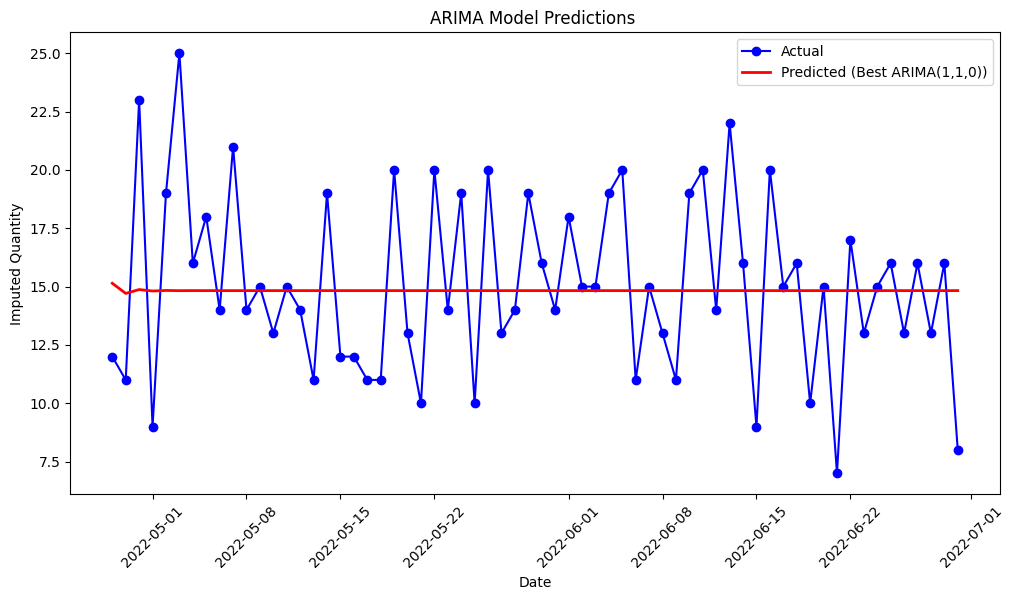

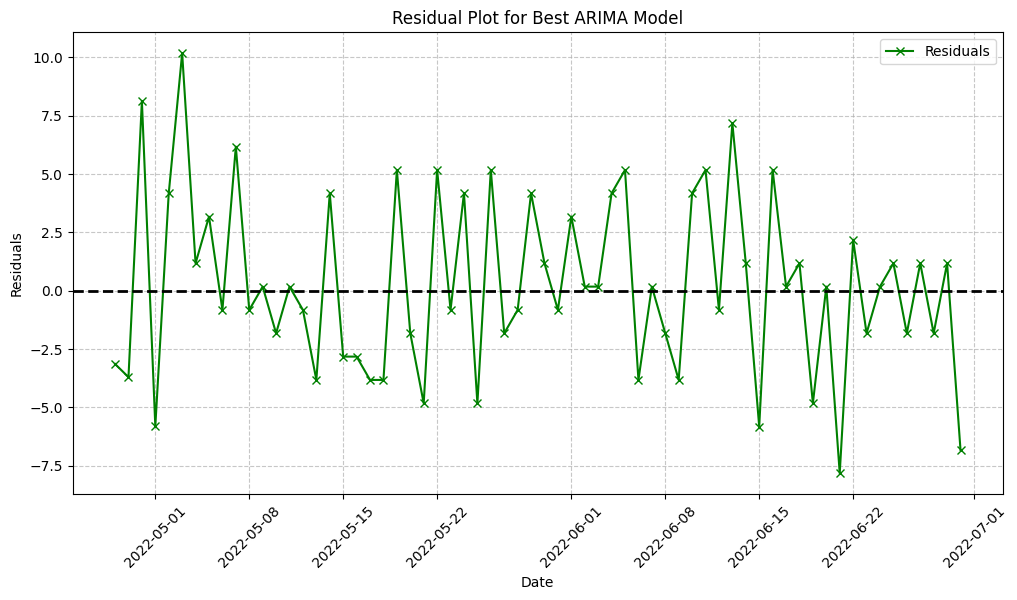

Best ARIMA Model (p=1, d=1, q=0) Evaluation Metrics:
RMSE: 3.8432431985341164
MAE: 3.075278449385264
MAPE: 22.273777573844853%
MSE: 14.770518283078745


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming merged_data is already loaded and indexed by 'Day Index'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Hyperparameter tuning for ARIMA
best_rmse = float('inf')
best_order = None
best_model = None

# Search for optimal p, d, q values (limit the range for demonstration purposes)
p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

# Grid search for best parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model with the current combination of (p, d, q)
                model_arima = ARIMA(train, order=(p, d, q))
                model_arima_fitted = model_arima.fit()
                
                # Make predictions on the test set
                predictions_arima = model_arima_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
                
                # Calculate RMSE for evaluation
                rmse_arima = np.sqrt(mean_squared_error(test, predictions_arima))
                
                # Update the best model if current model is better
                if rmse_arima < best_rmse:
                    best_rmse = rmse_arima
                    best_order = (p, d, q)
                    best_model = model_arima_fitted
            except Exception as e:
                continue

# Display the best model parameters
print(f"Best ARIMA Model (p={best_order[0]}, d={best_order[1]}, q={best_order[2]})")
print(f"Best RMSE: {best_rmse}")

# Make predictions using the best model
predictions_best_arima = best_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the predictions vs actual values for the best ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_best_arima, label=f'Predicted (Best ARIMA({best_order[0]},{best_order[1]},{best_order[2]}))', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title(f'ARIMA Model Predictions ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Residuals for the best ARIMA Model
residuals_best_arima = test - predictions_best_arima  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_best_arima, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.title(f'Residual Plot for Best ARIMA Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Evaluation metrics for the best ARIMA model
rmse_best_arima = np.sqrt(mean_squared_error(test, predictions_best_arima))
mae_best_arima = mean_absolute_error(test, predictions_best_arima)
mape_best_arima = np.mean(np.abs((test - predictions_best_arima) / test)) * 100
mse_best_arima = mean_squared_error(test, predictions_best_arima)

# Print metrics for the best ARIMA model
print(f"Best ARIMA Model (p={best_order[0]}, d={best_order[1]}, q={best_order[2]}) Evaluation Metrics:")
print(f"RMSE: {rmse_best_arima}")
print(f"MAE: {mae_best_arima}")
print(f"MAPE: {mape_best_arima}%")
print(f"MSE: {mse_best_arima}")


#SARIMA Model

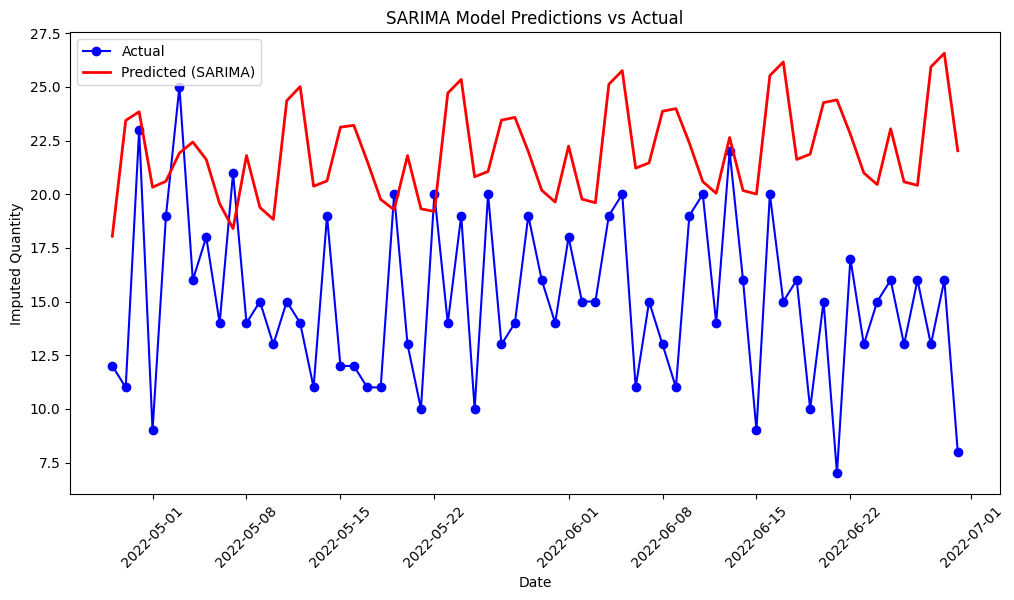

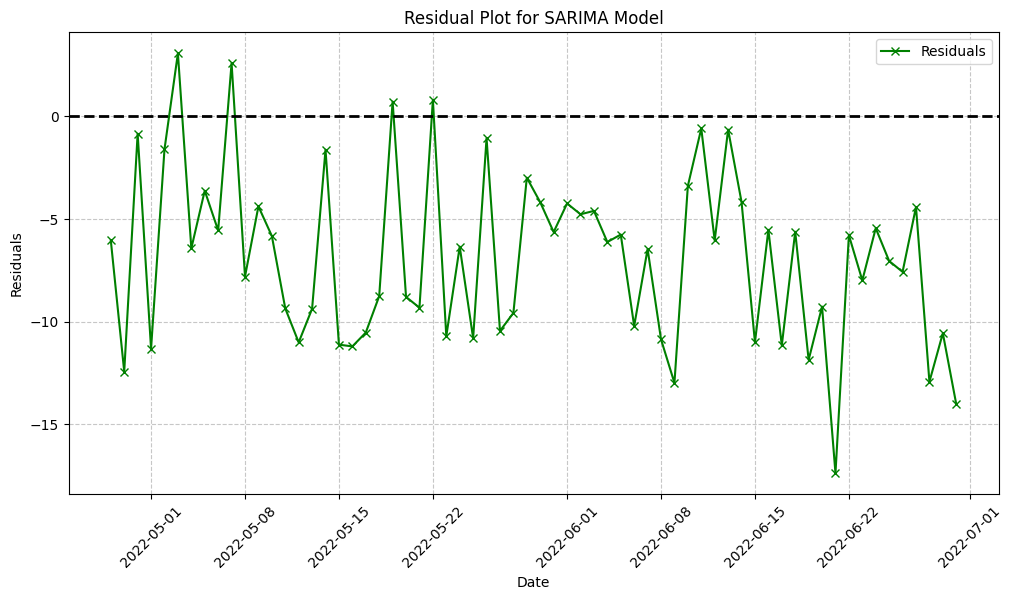

SARIMA Model Evaluation Metrics:
RMSE: 8.071929115609938
MAE: 7.100453621527362
MAPE: 56.92718019728184%
MSE: 65.15603964743144


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming merged_data is already loaded and indexed by 'Day Index'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Define the seasonal order (p, d, q, s)
# Here s is the seasonal period (e.g., 12 for monthly data with yearly seasonality)
# Adjust p, d, q based on your analysis
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (p, d, q, s)

# Fit the SARIMA model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order)
model_sarima_fitted = model_sarima.fit(disp=False)

# Make predictions on the test set
predictions_sarima = model_sarima_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_sarima, label='Predicted (SARIMA)', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Imputed Quantity')
plt.title('SARIMA Model Predictions vs Actual')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Residuals for the SARIMA Model
residuals_sarima = test - predictions_sarima  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_sarima, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot for SARIMA Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Evaluation metrics for the SARIMA model
rmse_sarima = np.sqrt(mean_squared_error(test, predictions_sarima))
mae_sarima = mean_absolute_error(test, predictions_sarima)
mape_sarima = np.mean(np.abs((test - predictions_sarima) / test)) * 100
mse_sarima = mean_squared_error(test, predictions_sarima)

# Print metrics for the SARIMA model
print(f"SARIMA Model Evaluation Metrics:")
print(f"RMSE: {rmse_sarima}")
print(f"MAE: {mae_sarima}")
print(f"MAPE: {mape_sarima}%")
print(f"MSE: {mse_sarima}")


##Hyperparameter Tuning for SARIMA model

Best SARIMA Model with parameters: (1, 0, 1, 0, 1, 1, 12)
AIC of the best model: 868.420594822222


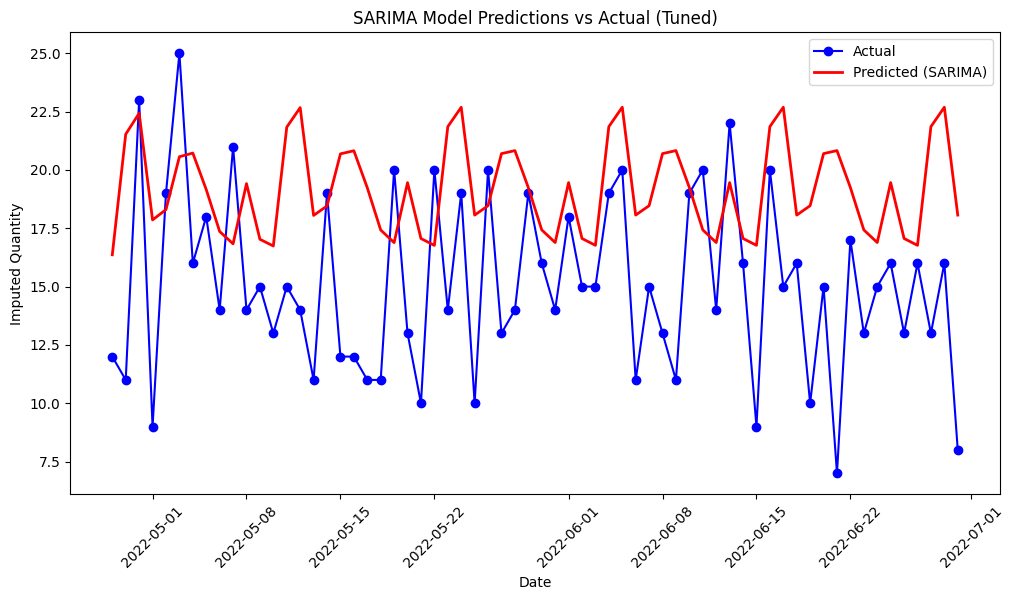

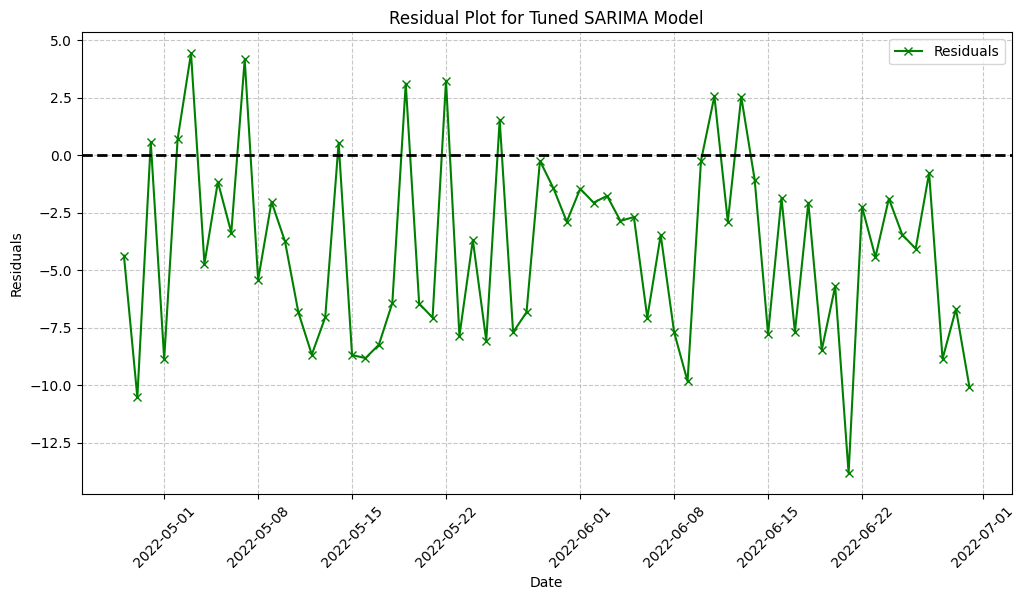

SARIMA Model Evaluation Metrics (Tuned):
RMSE: 5.7322857933063265
MAE: 4.803452287898654
MAPE: 39.180732589466835%
MSE: 32.859100416141544


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# Assuming merged_data is already loaded and indexed by 'Day Index'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'][:train_size]
test = merged_data['Imputed_Quantity'][train_size:]

# Define parameter grids for hyperparameter tuning
p_values = [0, 1, 2]  # AR (p)
d_values = [0, 1]  # Differencing (d)
q_values = [0, 1, 2]  # MA (q)
P_values = [0, 1, 2]  # Seasonal AR (P)
D_values = [0, 1]  # Seasonal Differencing (D)
Q_values = [0, 1, 2]  # Seasonal MA (Q)
s_values = [12]  # Seasonal period (e.g., 12 for monthly data with yearly seasonality)

# Best model variables
best_model = None
best_aic = float("inf")
best_params = None

# Grid search to find the best hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                # Define the SARIMA model with current hyperparameters
                                seasonal_order = (P, D, Q, s)
                                model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=seasonal_order)
                                model_sarima_fitted = model_sarima.fit(disp=False)

                                # Check the AIC to determine model quality
                                if model_sarima_fitted.aic < best_aic:
                                    best_aic = model_sarima_fitted.aic
                                    best_model = model_sarima_fitted
                                    best_params = (p, d, q, P, D, Q, s)
                                    
                            except Exception as e:
                                # Skip models that fail to fit
                                continue

# Display best model and hyperparameters
print(f"Best SARIMA Model with parameters: {best_params}")
print(f"AIC of the best model: {best_aic}")

# Make predictions on the test set using the best model
predictions_sarima = best_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_sarima, label='Predicted (SARIMA)', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Imputed Quantity')
plt.title('SARIMA Model Predictions vs Actual (Tuned)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Residuals for the SARIMA Model
residuals_sarima = test - predictions_sarima  # Calculate residuals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_sarima, label='Residuals', color='green', marker='x')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tuned SARIMA Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Evaluation metrics for the SARIMA model
rmse_sarima = np.sqrt(mean_squared_error(test, predictions_sarima))
mae_sarima = mean_absolute_error(test, predictions_sarima)
mape_sarima = np.mean(np.abs((test - predictions_sarima) / test)) * 100
mse_sarima = mean_squared_error(test, predictions_sarima)

# Print metrics for the SARIMA model
print(f"SARIMA Model Evaluation Metrics (Tuned):")
print(f"RMSE: {rmse_sarima}")
print(f"MAE: {mae_sarima}")
print(f"MAPE: {mape_sarima}%")
print(f"MSE: {mse_sarima}")


#ARIMAX Model

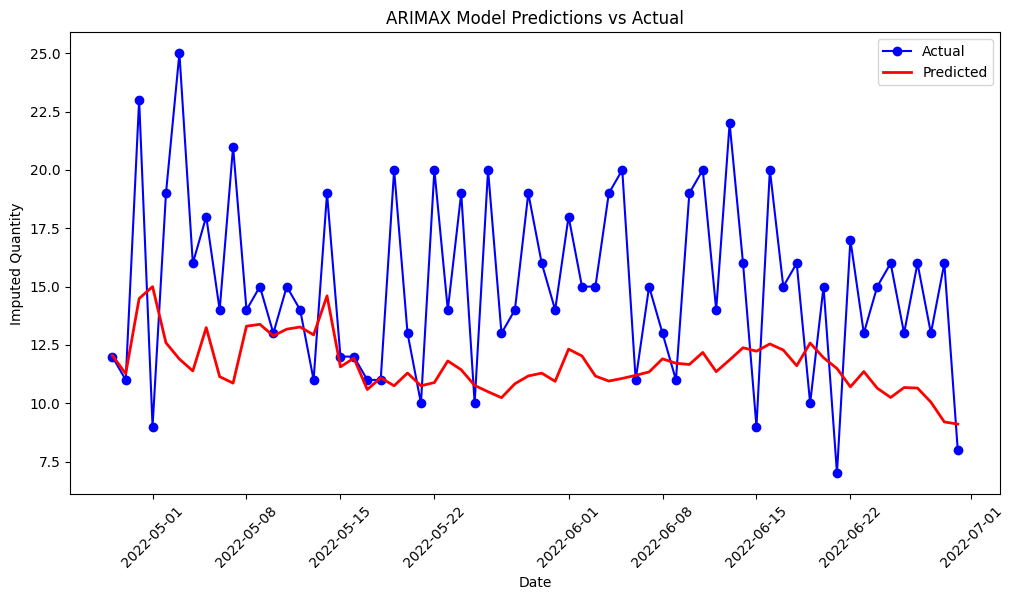

RMSE: 5.1679198821651475
MAE: 4.103106401233461
MAPE: 25.06189539750889%
MSE: 26.707395908477835


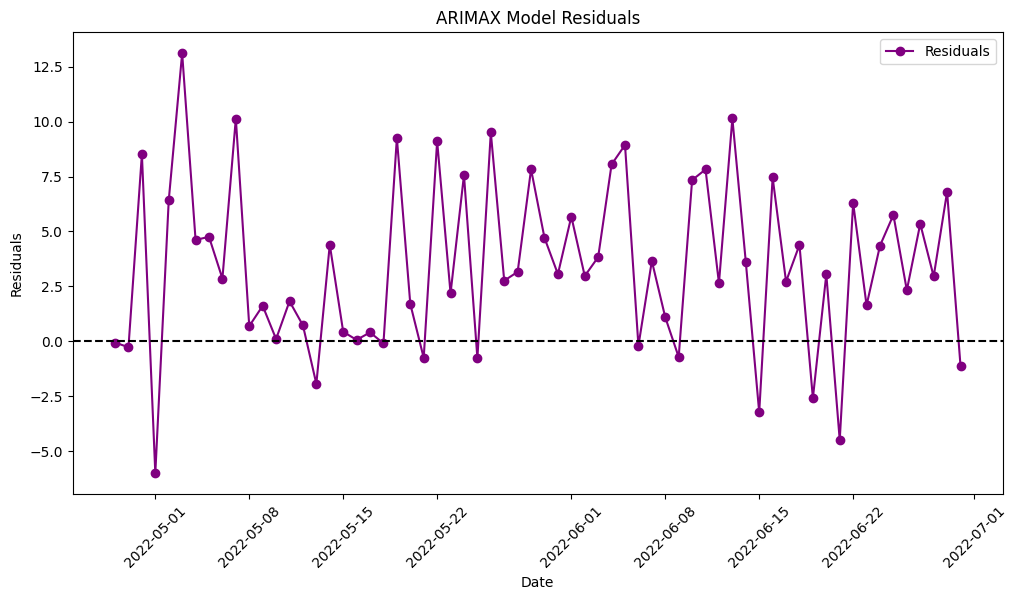

In [75]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# Assuming merged_data is already loaded and indexed by 'Day Index'
# Convert 'Day Index' to datetime (if it's not already)
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'].iloc[:train_size]
test = merged_data['Imputed_Quantity'].iloc[train_size:]

# Assuming 'Clicks' and 'Impressions' are your exogenous variables
exog_vars = ['Clicks', 'Impressions']
train_exog = merged_data[exog_vars].iloc[:train_size]
test_exog = merged_data[exog_vars].iloc[train_size:]

# Define initial ARIMAX model parameters
initial_order = (1, 1, 1)

# Fit the ARIMAX model
model_arimax = SARIMAX(train, exog=train_exog, order=initial_order)
model_arimax_fitted = model_arimax.fit(disp=False)

# Make predictions
predictions_arimax = model_arimax_fitted.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_arimax, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('ARIMAX Model Predictions vs Actual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, predictions_arimax))
mae = mean_absolute_error(test, predictions_arimax)
mape = np.mean(np.abs((test - predictions_arimax) / test)) * 100
mse = mean_squared_error(test, predictions_arimax)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'MSE: {mse}')

# Residual plot
residuals = test - predictions_arimax
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('ARIMAX Model Residuals')
plt.xticks(rotation=45)
plt.legend()
plt.show()


##Hyperparameter Tuning for ARIMAX model

Best ARIMAX order: (0, 1, 2)


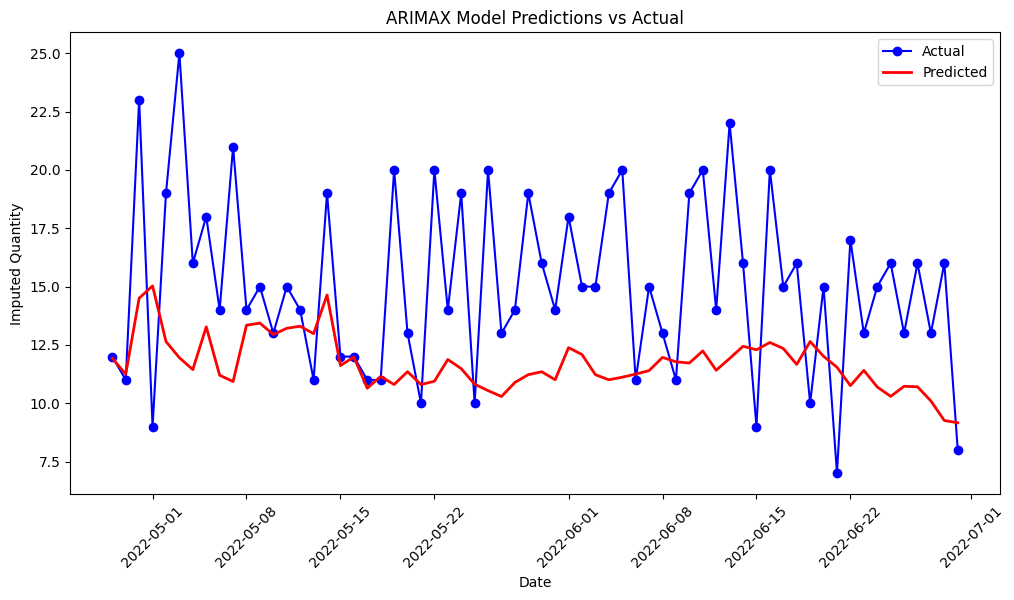

RMSE: 5.131687148587145
MAE: 4.069319326620672
MAPE: 24.885945334699418%
MSE: 26.334212990974464


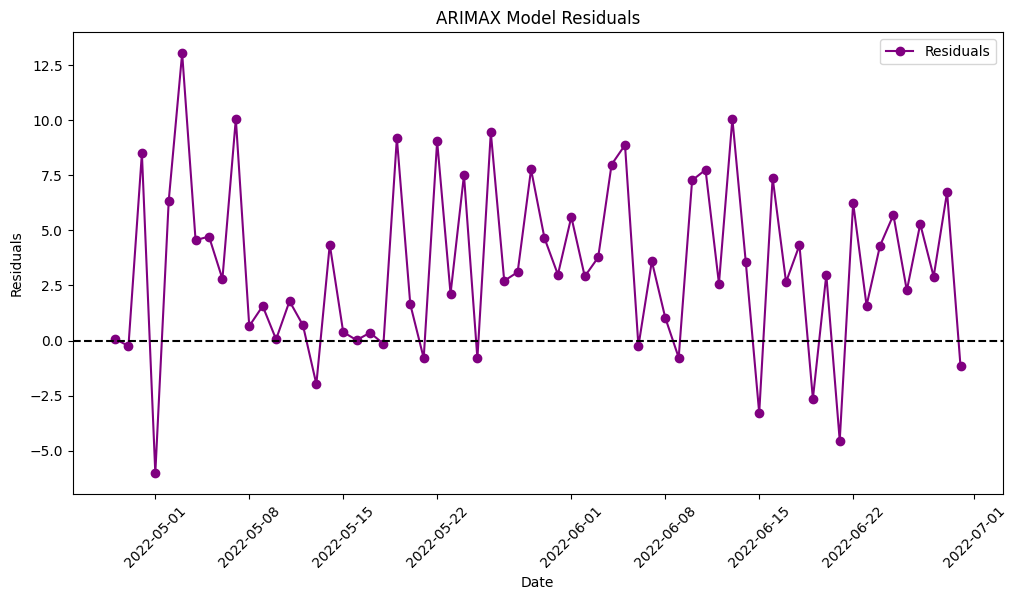

In [76]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# Assuming merged_data is already loaded and indexed by 'Day Index'
# Convert 'Day Index' to datetime (if it's not already)
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'].iloc[:train_size]
test = merged_data['Imputed_Quantity'].iloc[train_size:]

# Assuming 'Clicks' and 'Impressions' are your exogenous variables
exog_vars = ['Clicks', 'Impressions']
train_exog = merged_data[exog_vars].iloc[:train_size]
test_exog = merged_data[exog_vars].iloc[train_size:]

# Define the ARIMAX model fitting function
def fit_arimax(train, test, train_exog, test_exog, order):
    model = SARIMAX(train, exog=train_exog, order=order)
    model_fitted = model.fit(disp=False)
    predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)
    return model_fitted, predictions

# Hyperparameter tuning
p = d = q = range(0, 3)
pdq = [(x, y, z) for x in p for y in d for z in q]
best_aic = np.inf
best_order = None
best_mdl = None

for param in pdq:
    try:
        temp_mdl = SARIMAX(train, exog=train_exog, order=param).fit(disp=False)
        if temp_mdl.aic < best_aic:
            best_aic = temp_mdl.aic
            best_order = param
            best_mdl = temp_mdl
    except:
        continue

print(f'Best ARIMAX order: {best_order}')

# Fit the best ARIMAX model
model_arimax, predictions_arimax = fit_arimax(train, test, train_exog, test_exog, best_order)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_arimax, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('ARIMAX Model Predictions vs Actual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, predictions_arimax))
mae = mean_absolute_error(test, predictions_arimax)
mape = np.mean(np.abs((test - predictions_arimax) / test)) * 100
mse = mean_squared_error(test, predictions_arimax)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'MSE: {mse}')

# Residual plot
residuals = test - predictions_arimax
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('ARIMAX Model Residuals')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#SARIMAX Model

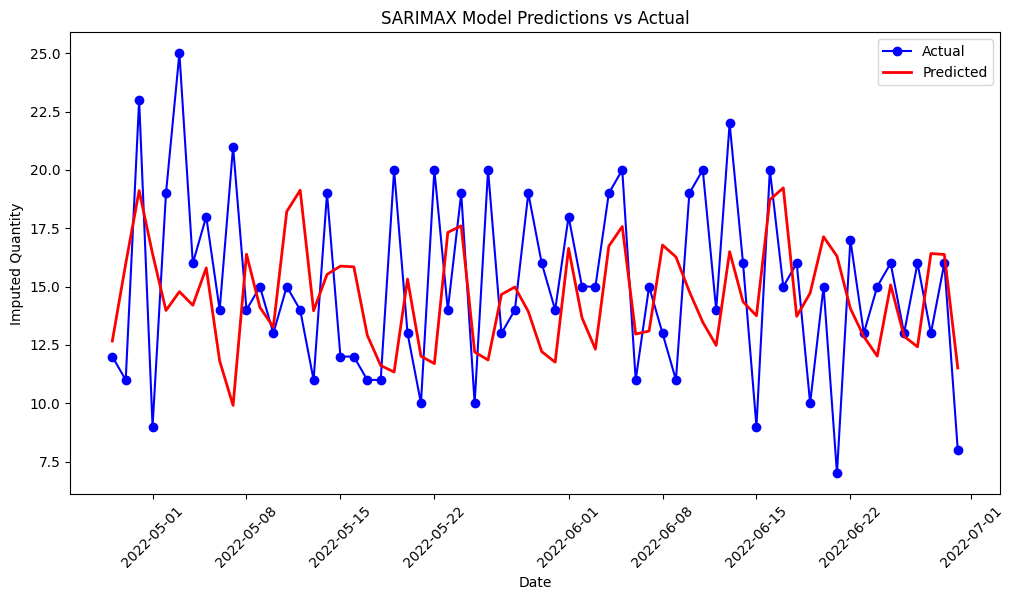

RMSE: 4.1984095750962025
MAE: 3.3944924487939545
MAPE: 23.915142305836117%
MSE: 17.626642960259474


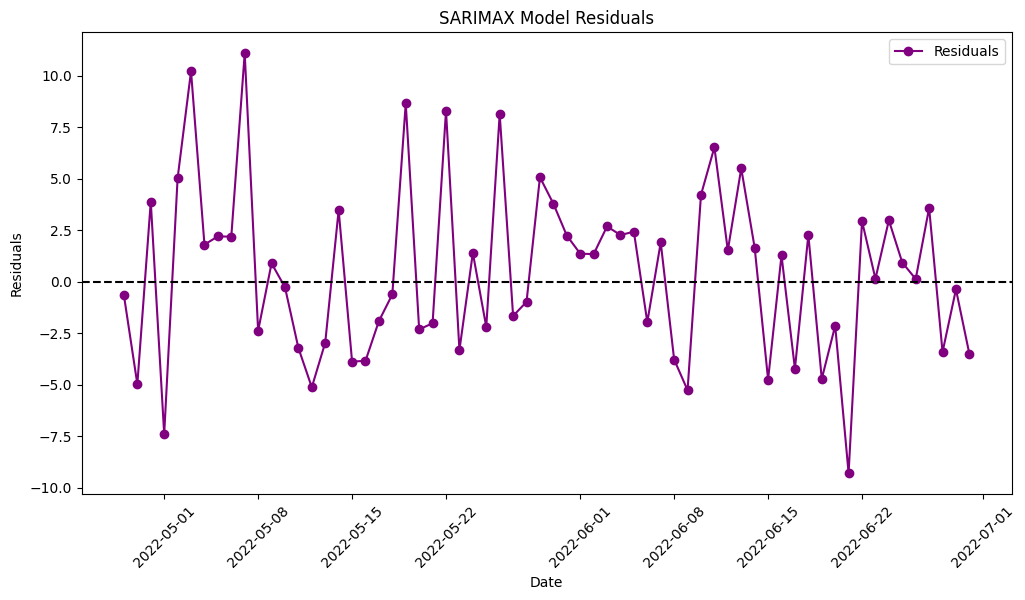

In [78]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# Assuming merged_data is already loaded and indexed by 'Day Index'
# Convert 'Day Index' to datetime (if it's not already)
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Define the train and test datasets for the target variable (Imputed_Quantity)
train_size = int(0.7 * len(merged_data))
train = merged_data['Imputed_Quantity'].iloc[:train_size]
test = merged_data['Imputed_Quantity'].iloc[train_size:]

# Assuming 'Clicks' and 'Impressions' are your exogenous variables
exog_vars = ['Clicks', 'Impressions']
train_exog = merged_data[exog_vars].iloc[:train_size]
test_exog = merged_data[exog_vars].iloc[train_size:]

# Define initial SARIMAX model parameters
initial_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (P, D, Q, S)

# Fit the SARIMAX model
model_sarimax = SARIMAX(train, exog=train_exog, order=initial_order, seasonal_order=seasonal_order)
model_sarimax_fitted = model_sarimax.fit(disp=False)

# Make predictions
predictions_sarimax = model_sarimax_fitted.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_sarimax, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Imputed Quantity')  # Label for y-axis
plt.title('SARIMAX Model Predictions vs Actual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, predictions_sarimax))
mae = mean_absolute_error(test, predictions_sarimax)
mape = np.mean(np.abs((test - predictions_sarimax) / test)) * 100
mse = mean_squared_error(test, predictions_sarimax)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'MSE: {mse}')

# Residual plot
residuals = test - predictions_sarimax
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('SARIMAX Model Residuals')
plt.xticks(rotation=45)
plt.legend()
plt.show()


####Model performance is good and it is doing predictions well

##Hyperparameter Tuning for SARIMAX model

Best ARIMA order: (0, 0, 1)
Best seasonal order: (0, 1, 1, 12)
Best AIC: 858.7293179965268


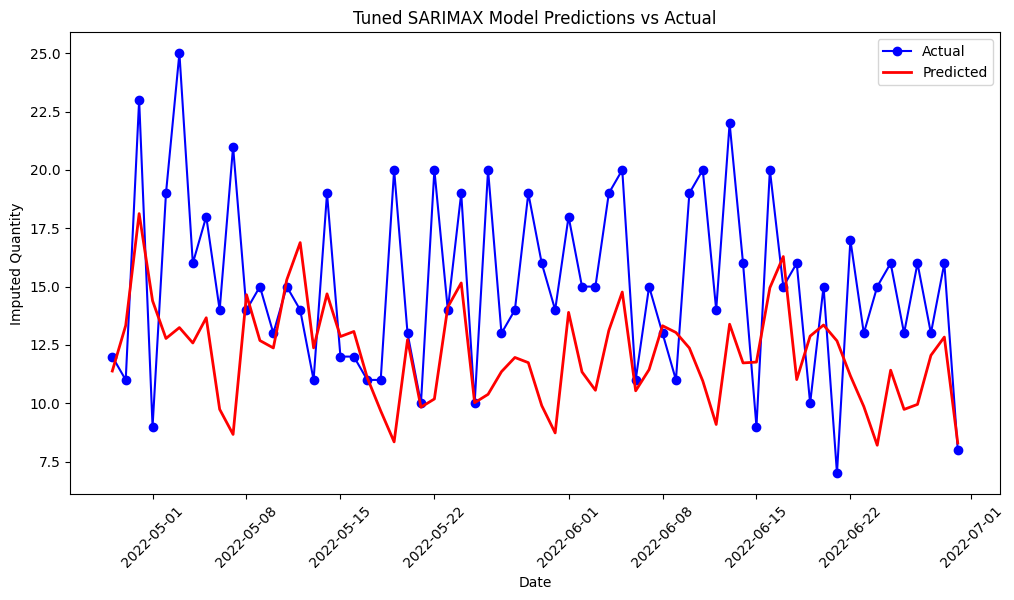

Tuned Model RMSE: 4.972912707177772
Tuned Model MAE: 3.9173083447300394
Tuned Model MAPE: 24.402133930869617%
Tuned Model MSE: 24.72986079321016


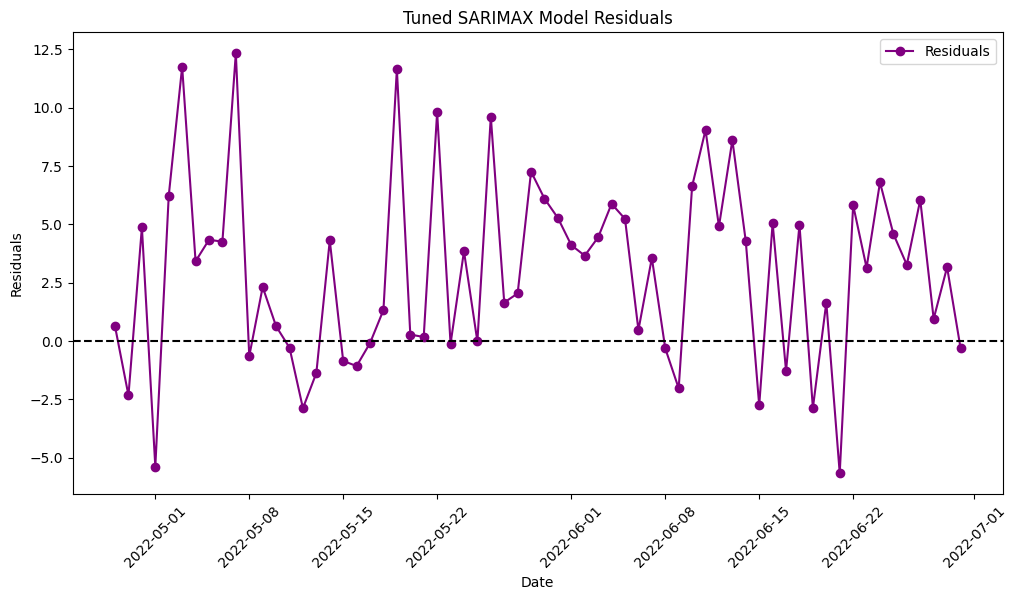

In [14]:
import itertools
import statsmodels.api as sm

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Grid search to find the best parameters
best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train, exog=train_exog, order=param, seasonal_order=param_seasonal)
            temp_model_fitted = temp_model.fit(disp=False)
            if temp_model_fitted.aic < best_aic:
                best_aic = temp_model_fitted.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = temp_model_fitted
        except:
            continue

# Print the best parameters
print(f'Best ARIMA order: {best_pdq}')
print(f'Best seasonal order: {best_seasonal_pdq}')
print(f'Best AIC: {best_aic}')

# Make predictions with the best model
predictions_best_sarimax = best_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], test, label='Actual', color='blue', marker='o')
plt.plot(merged_data['Day Index'].iloc[train_size:], predictions_best_sarimax, label='Predicted', color='red', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Imputed Quantity')
plt.title('Tuned SARIMAX Model Predictions vs Actual')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evaluation metrics for the best model
rmse_best = np.sqrt(mean_squared_error(test, predictions_best_sarimax))
mae_best = mean_absolute_error(test, predictions_best_sarimax)
mape_best = np.mean(np.abs((test - predictions_best_sarimax) / test)) * 100
mse_best = mean_squared_error(test, predictions_best_sarimax)

print(f'Tuned Model RMSE: {rmse_best}')
print(f'Tuned Model MAE: {mae_best}')
print(f'Tuned Model MAPE: {mape_best}%')
print(f'Tuned Model MSE: {mse_best}')

# Residual plot for the best model
residuals_best = test - predictions_best_sarimax
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'].iloc[train_size:], residuals_best, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Tuned SARIMAX Model Residuals')
plt.xticks(rotation=45)
plt.legend()
plt.show()


##Evaluation Metrics Table

In [15]:
import pandas as pd

# Creating the data with the new RMSE values and updated metrics
data = {
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [4.2339, 4.2210, 3.0753, 4.8035, 4.0693, 3.3945],
    "RMSE": [5.0082, 4.9923, 3.8432, 5.7323, 5.1317, 4.1984],  # Updated RMSE values
    "MSE": [25.0823, 24.9231, 14.7705, 32.8591, 26.3342, 17.6266],
    "MAPE": [34.9118, 34.7960, 22.2738, 39.1807, 24.8859, 23.9151]
}

# Create DataFrame
df = pd.DataFrame(data)

# Styling the table with blue theme and left-align the Model column
styled_table = df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'navy'), ('color', 'white'), ('font-weight', 'bold')]},  # Header styles
    {'selector': 'td', 'props': [('background-color', 'lightblue'), ('color', 'black')]},  # Cell styles
    {'selector': 'td:nth-child(1)', 'props': [('text-align', 'left')]}  # Left-align "Model" column
]).hide_index()

# Adding a centered title above the table
styled_table = styled_table.set_caption('Evaluation Metrics for the Models').set_table_attributes('style="text-align: center;"')

# Display the styled table
styled_table


#Multivariate Regression

In [17]:
from sklearn.model_selection import train_test_split

# Assuming your full dataset is in 'df' (replace this with your actual DataFrame)

# Split into train and temporary (80% for training, 20% for test+validation)
train_set, temp_set = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set into test and validation (50% for each, so 10% test, 10% validation)
test_set, validation_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Now you have:
# - train_set (80% of the data)
# - test_set (10% of the data)
# - validation_set (10% of the data)


In [18]:
train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42)  # 70% for training
test_set, validation_set = train_test_split(temp_set, test_size=0.5, random_state=42)  # 50% of 30% for test, 50% for validation


In [19]:
# Display column names to verify
print(train_set.columns)


Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'Imputed_Quantity',
       'log_quantity', 'log_clicks', 'log_impressions', 'Month', 'Year',
       'Month_Name', 'Day_Of_Week', 'Week_Of_Month', 'Day_Of_Week_Numeric',
       'Month_Numeric', 'Weekday_1', 'Month_1', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
      dtype='object')


Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'Imputed_Quantity',
       'log_quantity', 'log_clicks', 'log_impressions', 'Month', 'Year',
       'Month_Name', 'Day_Of_Week', 'Week_Of_Month', 'Day_Of_Week_Numeric',
       'Month_Numeric', 'Weekday_1', 'Month_1', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
      dtype='object')
'Imputed_Quantity' column is present in the dataframe.
                            OLS Regression Results                            
Dep. Variable:       Imputed_Quantity   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     4.091
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.10e-05
Time:                        15:

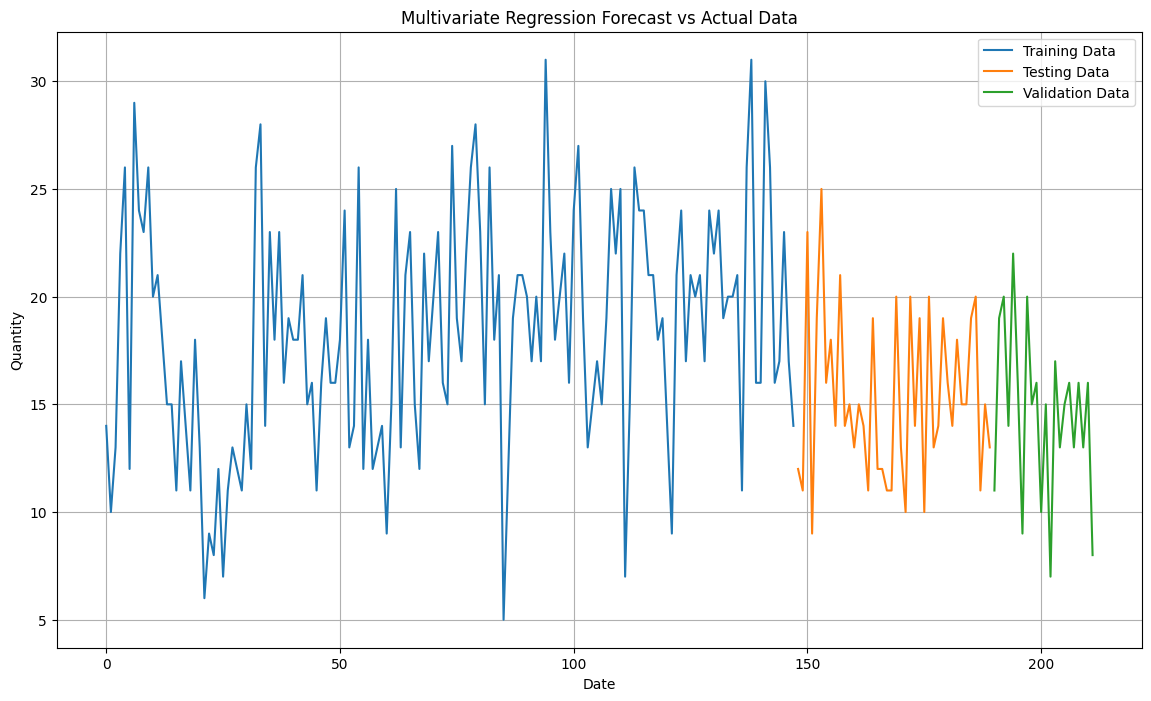

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\sravy\Downloads\final_dataset.csv'
df = pd.read_csv(file_path)

# Verify the columns
print(df.columns)

# Check if 'Imputed_Quantity' exists
expected_column = 'Imputed_Quantity'
if expected_column not in df.columns:
    raise KeyError(f"Error: '{expected_column}' column not found in the dataframe.")
else:
    print(f"'{expected_column}' column is present in the dataframe.")

# Ensure all necessary columns are numeric
exog_vars = ['Clicks', 'Impressions', 'Day Index', 'Month_Numeric', 'Week_Of_Month',
             'Day_Of_Week_Numeric', 'Weekday_1', 'Month_1', 'Monday', 'Tuesday', 
             'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df[exog_vars] = df[exog_vars].apply(pd.to_numeric, errors='coerce')

# Check for NaN values and handle them (e.g., fill with 0 or mean)
df[exog_vars] = df[exog_vars].fillna(0)

# Manually split the dataset into training, testing, and validation sets
# Assuming a 70% train, 20% test, and 10% validation split
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
validation_size = len(df) - train_size - test_size

train_set = df[:train_size]
test_set = df[train_size:train_size + test_size]
validation_set = df[train_size + test_size:]

# Extract the target variable
train_target = train_set['Imputed_Quantity']
test_target = test_set['Imputed_Quantity']
validation_target = validation_set['Imputed_Quantity']

# Extract the exogenous variables
train_exog = train_set[exog_vars]
test_exog = test_set[exog_vars]
validation_exog = validation_set[exog_vars]

# Add a constant term to the predictors (for the intercept)
train_exog = sm.add_constant(train_exog)
test_exog = sm.add_constant(test_exog)
validation_exog = sm.add_constant(validation_exog)

# Ensure alignment of columns
test_exog = test_exog.reindex(columns=train_exog.columns, fill_value=0)
validation_exog = validation_exog.reindex(columns=train_exog.columns, fill_value=0)

# Fit the linear regression model
model = sm.OLS(train_target, train_exog).fit()

# Print the model summary
print(model.summary())

# Make predictions
train_predictions = model.predict(train_exog)
test_predictions = model.predict(test_exog)
validation_predictions = model.predict(validation_exog)

# Calculate metrics
def calculate_metrics(true_values, predictions):
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    mape = mean_absolute_percentage_error(true_values, predictions)
    return rmse, mae, mape

def calculate_r_squared(true_values, predictions):
    ss_total = np.sum((true_values - np.mean(true_values))**2)
    ss_res = np.sum((true_values - predictions)**2)
    r_squared = 1 - (ss_res / ss_total)
    return r_squared

def calculate_adjusted_r_squared(r_squared, n, k):
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

# Calculate metrics for test data
test_rmse, test_mae, test_mape = calculate_metrics(test_target, test_predictions)
test_r_squared = calculate_r_squared(test_target, test_predictions)
test_adjusted_r_squared = calculate_adjusted_r_squared(test_r_squared, len(test_target), len(exog_vars) + 1)

# Calculate metrics for validation data
validation_rmse, validation_mae, validation_mape = calculate_metrics(validation_target, validation_predictions)
validation_r_squared = calculate_r_squared(validation_target, validation_predictions)
validation_adjusted_r_squared = calculate_adjusted_r_squared(validation_r_squared, len(validation_target), len(exog_vars) + 1)

# Print the metrics
print(f"Linear Regression Model\n Test Data:\n RMSE: {test_rmse}\n MAE: {test_mae}\n MAPE: {test_mape}\n R²: {test_r_squared}\n Adjusted R²: {test_adjusted_r_squared}\n")
print(f"Validation Data:\n RMSE: {validation_rmse}\n MAE: {validation_mae}\n MAPE: {validation_mape}\n R²: {validation_r_squared}\n Adjusted R²: {validation_adjusted_r_squared}\n")

# Plot the forecast
def plot_multivar_forecast(train_data, test_data, validation_data, forecast_test, forecast_validation):
    plt.figure(figsize=(14, 8))

    # Plot training data
    plt.plot(train_data.index, train_data, label='Training Data')

    # Plot testing data
    plt.plot(test_data.index, test_data, label='Testing Data')

    # Plot validation data
    plt.plot(validation_data.index, validation_data, label='Validation Data')

    
    plt.title('Multivariate Regression Forecast vs Actual Data')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot forecast
plot_multivar_forecast(train_target, test_target, validation_target, test_predictions, validation_predictions)


##Multivariate Regression(Dynamic)

                            OLS Regression Results                            
Dep. Variable:       Imputed_Quantity   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.67
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.59e-08
Time:                        21:27:27   Log-Likelihood:                -629.65
No. Observations:                 211   AIC:                             1267.
Df Residuals:                     207   BIC:                             1281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

c:\Users\sravy\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


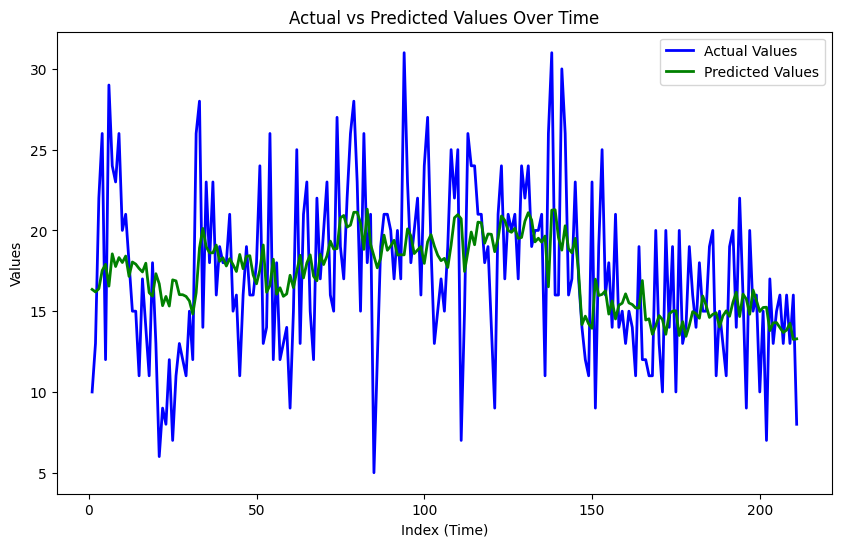

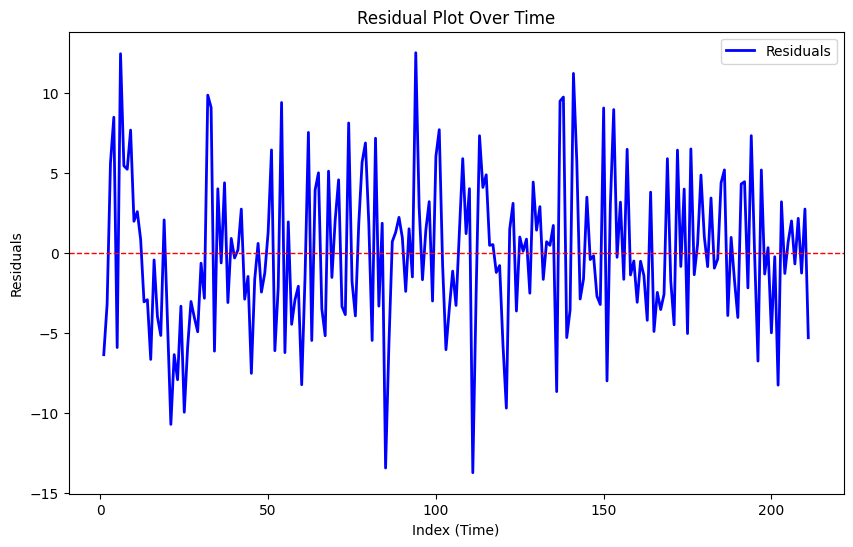

RMSE: 4.783670332562788
MAE: 3.8246243814533485
MAPE: 26.178399304978267%
MSE: 22.883501850641377


In [6]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Load the data
final_dataset = pd.read_csv('final_dataset.csv')

# Step 2: Define the lagged variables
final_dataset['Imputed_Quantity_lag1'] = final_dataset['Imputed_Quantity'].shift(1)
final_dataset['Clicks_lag1'] = final_dataset['Clicks'].shift(1)
final_dataset['Impressions_lag1'] = final_dataset['Impressions'].shift(1)

# Ensure HighSeason columns exist or create dummy ones for testing
if 'Clicks_HighSeason' not in final_dataset.columns:
    final_dataset['Clicks_HighSeason'] = 0  # or appropriate logic to create it
if 'Impressions_HighSeason' not in final_dataset.columns:
    final_dataset['Impressions_HighSeason'] = 0  # or appropriate logic to create it

# Step 3: Drop NaN values created by lagging
final_dataset = final_dataset.dropna()

# Step 4: Define the dependent and independent variables
y = final_dataset['Imputed_Quantity']  # Dependent variable
X = final_dataset[['Clicks_lag1', 'Impressions_lag1', 'Imputed_Quantity_lag1', 'Clicks_HighSeason', 'Impressions_HighSeason']]  # Independent variables

# Step 5: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 6: Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Step 7: Print the summary of the model
print(model.summary())

# Step 8: Predicted vs Actual Plot (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(final_dataset.index, y, color='blue', label='Actual Values', linestyle='-', linewidth=2)
plt.plot(final_dataset.index, model.predict(X), color='green', label='Predicted Values', linestyle='-', linewidth=2)
plt.xlabel('Index (Time)')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

# Step 9: Residual Plot (Line Plot)
residuals = y - model.predict(X)
plt.figure(figsize=(10, 6))
plt.plot(final_dataset.index, residuals, color='blue', label='Residuals', linestyle='-', linewidth=2)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line at 0 for reference
plt.xlabel('Index (Time)')
plt.ylabel('Residuals')
plt.title('Residual Plot Over Time')
plt.legend()
plt.show()

# Calculate RMSE, MAE, MAPE
predictions = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = np.mean(np.abs((y - predictions) / y)) * 100
mse = mean_squared_error(y, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'MSE: {mse}')


####1.Lagged and seasonal variables are significant predictors.
                                                                     ####2.Performance metrics indicate model's accuracy.

##Model Selection

Best model for Forecasting is Sarimax

In [9]:
from IPython.display import display, HTML

# HTML for bullet points with larger font size
points = """
<ul style="font-size:20px;">
    <li><b>Handles Exogenous Variables</b>: Includes external factors (e.g., promotions, holidays) to improve forecast accuracy.</li>
    <li><b>Seasonal and Non-Seasonal Modeling</b>: Captures both seasonal and trend components, offering flexibility in modeling.</li>
    <li><b>Improved Forecasting</b>: Provides more accurate predictions by accounting for external influences and seasonality.</li>
    <li><b>Reduced Residuals</b>: Produces residuals with no patterns, indicating good model fit.</li>
    <li><b>Versatile for Complex Data</b>: Effective for data with multiple seasonalities or complex trends, ensuring reliable forecasts.</li>
</ul>
"""

display(HTML(points))


#Forecasting Using SARIMAX

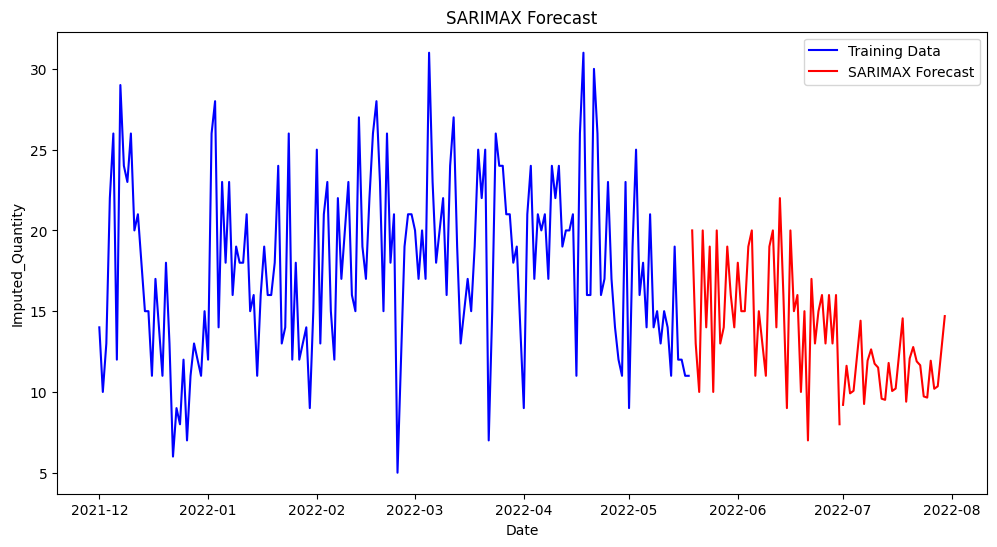

In [42]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the final dataset (ensure correct path to CSV file)
final_dataset = pd.read_csv('final_dataset.csv')

# Preprocessing (assuming Day Index is the correct column)
final_dataset['Day Index'] = pd.to_datetime(final_dataset['Day Index'], format='%Y-%m-%d')  # Modify format if needed
final_dataset.set_index('Day Index', inplace=True)

# Split data into train and test
train_size = int(len(final_dataset) * 0.8)
train, test = final_dataset[:train_size], final_dataset[train_size:]

# Assuming you have preprocessed exogenous variables for training and testing
train_exog = train[['Clicks', 'Impressions']]  # Replace with actual exogenous variables
test_exog = test[['Clicks', 'Impressions']]    # Replace with actual exogenous variables

# Fit SARIMAX model
sarimax_model = SARIMAX(train['Imputed_Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train_exog)
sarimax_model_fit = sarimax_model.fit()

# Forecast for the future (e.g., 1 month ahead)
forecast_steps = 30  # Forecasting for 30 days
future_dates = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Make forecasts for the future period using exogenous variables for the forecast period
# You need to provide the future exogenous variables for prediction
# Assuming you have some forecasted exogenous data (e.g., future clicks and impressions)
future_exog = pd.DataFrame({
    'Clicks': [100] * forecast_steps,  # Replace with actual future values
    'Impressions': [200] * forecast_steps  # Replace with actual future values
}, index=future_dates)

# Make predictions (forecast) using the SARIMAX model
sarimax_forecast = sarimax_model_fit.forecast(steps=forecast_steps, exog=future_exog)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Imputed_Quantity'],color='blue', label='Training Data')
plt.plot(test.index, test['Imputed_Quantity'],color='red')
plt.plot(future_dates, sarimax_forecast, color='red', label='SARIMAX Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Imputed_Quantity')
plt.legend()
plt.show()




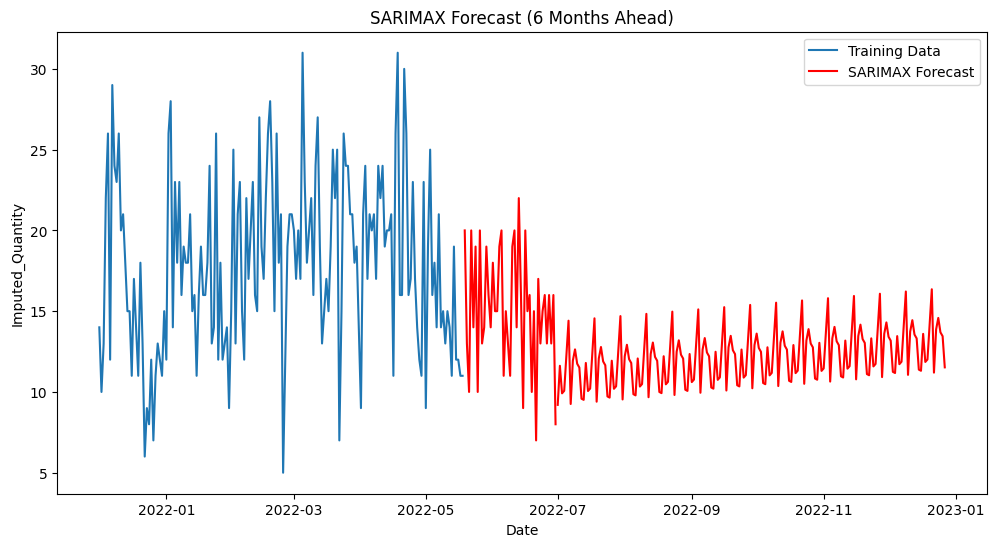

SARIMAX Forecast for the next 6 months:
2022-05-19     9.200538
2022-05-20    11.619677
2022-05-21     9.914118
2022-05-22    10.069840
2022-05-23    12.244651
                ...    
2022-11-10    13.874245
2022-11-11    14.580555
2022-11-12    13.690846
2022-11-13    13.452426
2022-11-14    11.522088
Freq: D, Name: predicted_mean, Length: 180, dtype: float64


In [44]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the final dataset (ensure correct path to CSV file)
final_dataset = pd.read_csv('final_dataset.csv')

# Preprocessing (assuming Day Index is the correct column)
final_dataset['Day Index'] = pd.to_datetime(final_dataset['Day Index'], format='%Y-%m-%d')  # Modify format if needed
final_dataset.set_index('Day Index', inplace=True)

# Split data into train and test
train_size = int(len(final_dataset) * 0.8)
train, test = final_dataset[:train_size], final_dataset[train_size:]

# Assuming you have preprocessed exogenous variables for training and testing
train_exog = train[['Clicks', 'Impressions']]  # Replace with actual exogenous variables
test_exog = test[['Clicks', 'Impressions']]    # Replace with actual exogenous variables

# Fit SARIMAX model
sarimax_model = SARIMAX(train['Imputed_Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train_exog)
sarimax_model_fit = sarimax_model.fit()

# Forecast for the future (e.g., 6 months ahead)
forecast_steps = 180  # Forecasting for 180 days
future_dates = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Make forecasts for the future period using exogenous variables for the forecast period
# You need to provide the future exogenous variables for prediction
# Assuming you have some forecasted exogenous data (e.g., future clicks and impressions)
future_exog = pd.DataFrame({
    'Clicks': [100] * forecast_steps,  # Replace with actual future values
    'Impressions': [200] * forecast_steps  # Replace with actual future values
}, index=future_dates)

# Make predictions (forecast) using the SARIMAX model
sarimax_forecast = sarimax_model_fit.forecast(steps=forecast_steps, exog=future_exog)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Imputed_Quantity'], label='Training Data')
plt.plot(test.index, test['Imputed_Quantity'], color='red')
plt.plot(future_dates, sarimax_forecast, color='red', label='SARIMAX Forecast')
plt.title('SARIMAX Forecast (6 Months Ahead)')
plt.xlabel('Date')
plt.ylabel('Imputed_Quantity')
plt.legend()
plt.show()

# Print the forecasted values
print("SARIMAX Forecast for the next 6 months:")
print(sarimax_forecast)


Daily Forecasted `Imputed_Quantity` for 2 Months (60 Days):
            Forecasted_Quantity
Date                           
2022-07-01            15.708946
2022-07-02            14.958306
2022-07-03            16.577980
2022-07-04            15.626799
2022-07-05            16.358607
2022-07-06            15.511590
2022-07-07            15.046148
2022-07-08            16.380690
2022-07-09            15.466667
2022-07-10            16.257217
2022-07-11            16.575950
2022-07-12            16.501407
2022-07-13            14.954035
2022-07-14            14.035210
2022-07-15            15.615972
2022-07-16            14.386866
2022-07-17            15.363084
2022-07-18            15.289932
2022-07-19            15.642868
2022-07-20            13.995150
2022-07-21            13.004176
2022-07-22            14.051936
2022-07-23            15.205274
2022-07-24            16.426119
2022-07-25            16.420676
2022-07-26            16.213074
2022-07-27            15.345670
2022-07-28  

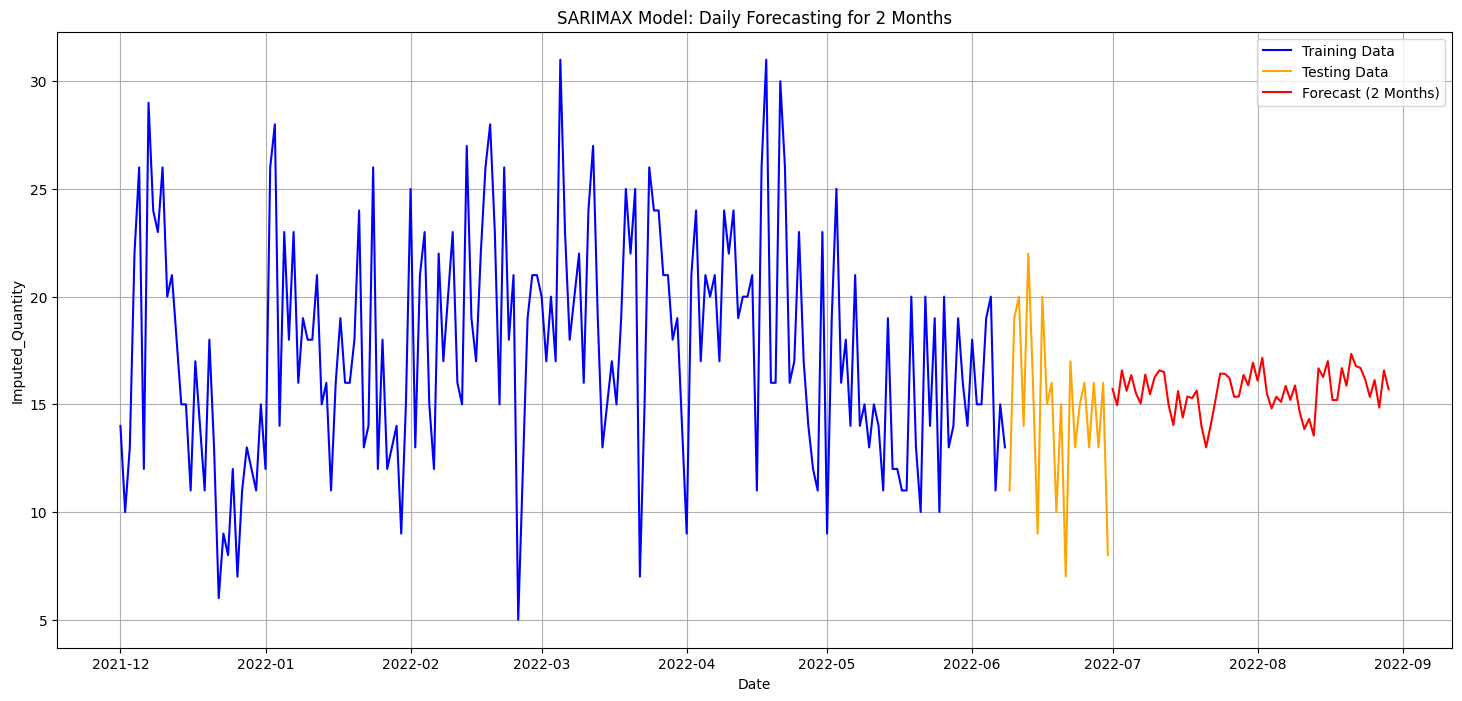

In [51]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Load final dataset
file_path = 'final_dataset.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Preprocess data
data['Day Index'] = pd.to_datetime(data['Day Index'])  # Ensure datetime format
data.set_index('Day Index', inplace=True)  # Set date as index

# Split into train (90%) and test (10%)
train_size = int(len(data) * 0.9)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Define exogenous variables (relevant features for SARIMAX)
exog_train = train[['Impressions', 'Clicks', 'Month', 'Day_Of_Week']]
exog_test = test[['Impressions', 'Clicks', 'Month', 'Day_Of_Week']]

# Convert categorical variables using one-hot encoding (if necessary)
all_data = pd.concat([exog_train, exog_test])
all_data = pd.get_dummies(all_data, drop_first=True)  # One-hot encoding
exog_train = all_data.iloc[:len(exog_train)]
exog_test = all_data.iloc[len(exog_train):]

# Ensure numeric dtype
exog_train = exog_train.astype(float)
exog_test = exog_test.astype(float)

# Define and fit SARIMAX model with the best parameters (using appropriate seasonal order)
model = SARIMAX(
    train['Imputed_Quantity'],
    exog=exog_train,
    order=(0, 1, 1),  # ARIMA(0, 1, 1) for basic differencing and MA
    seasonal_order=(0, 1, 1, 7),  # Weekly seasonality (7 days in a week)
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False, maxiter=50)

# Forecast for test set
test_forecast_steps = len(test)
predictions = model.forecast(steps=test_forecast_steps, exog=exog_test)

# Forecast additional 2 months (60 days) beyond the test data
future_steps = 60  # 60 days
future_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# You need 60 rows in the future_exog, repeat last values for simplicity
future_exog = pd.concat([exog_test] * (future_steps // len(exog_test) + 1))
future_exog = future_exog.iloc[:future_steps]

# Make the forecast for the future period
future_forecast = model.forecast(steps=future_steps, exog=future_exog)

# Combine forecast data into a DataFrame for better display
future_forecast_df = pd.DataFrame({
    'Date': future_index,
    'Forecasted_Quantity': future_forecast
})
future_forecast_df.set_index('Date', inplace=True)

# Print the forecasted values
print("Daily Forecasted `Imputed_Quantity` for 2 Months (60 Days):")
print(future_forecast_df)

# Calculate metrics for model performance on test data
mae = mean_absolute_error(test['Imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['Imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['Imputed_Quantity'] - predictions) / test['Imputed_Quantity'])) * 100
r2 = r2_score(test['Imputed_Quantity'], predictions)

print(f"\nModel Performance Metrics:\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}\nMAPE: {mape:.2f}%\nR^2: {r2:.4f}")

# Plot results
plt.figure(figsize=(18, 8))

# Plot training data
plt.plot(train['Imputed_Quantity'], label='Training Data', color='blue')

# Plot testing data
plt.plot(test['Imputed_Quantity'], label='Testing Data', color='orange')



# Plot future forecast data
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted_Quantity'], label='Forecast (2 Months)', color='red')

plt.title('SARIMAX Model: Daily Forecasting for 2 Months')
plt.xlabel('Date')
plt.ylabel('Imputed_Quantity')
plt.legend()
plt.grid()
plt.show()


In [56]:
import pandas as pd

# Load your final dataset
file_path = 'final_dataset.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)


# Ensure the 'Day Index' column is datetime type
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Add the 'Weekend' column to mark Saturdays and Sundays
data['Weekend'] = data['Day_Of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Now you can proceed with the resampling
weekly_data = data.resample('W').agg({
    'Impressions': 'sum',       # Weekly sum of impressions
    'Clicks': 'sum',           # Weekly sum of clicks
    'Imputed_Quantity': 'sum', # Weekly sum of imputed_quantity
    'Month': 'last',           # Last month of the week
    'Day_Of_Week': 'last',     # Last day of the week
    'Month_Numeric': 'last',   # Last month's numeric value in the week
    'Day_Of_Week_Numeric': 'last', # Last day's numeric value of the week
    'Weekend': 'last'          # Use the last weekend value (0 or 1)
})

# Now `weekly_data` will have the aggregated weekly data you need
print(weekly_data.head())


            Impressions  Clicks  Imputed_Quantity  Month Day_Of_Week  \
Day Index                                                              
2021-12-05         3920    2180              85.0     12      Sunday   
2021-12-12         7727    2945             155.0     12      Sunday   
2021-12-19         9581    2909             101.0     12      Sunday   
2021-12-26         9752    2546              73.0     12      Sunday   
2022-01-02         7961    2425             100.0      1      Sunday   

            Month_Numeric  Day_Of_Week_Numeric  Weekend  
Day Index                                                
2021-12-05             12                    6        1  
2021-12-12             12                    6        1  
2021-12-19             12                    6        1  
2021-12-26             12                    6        1  
2022-01-02              1                    6        1  


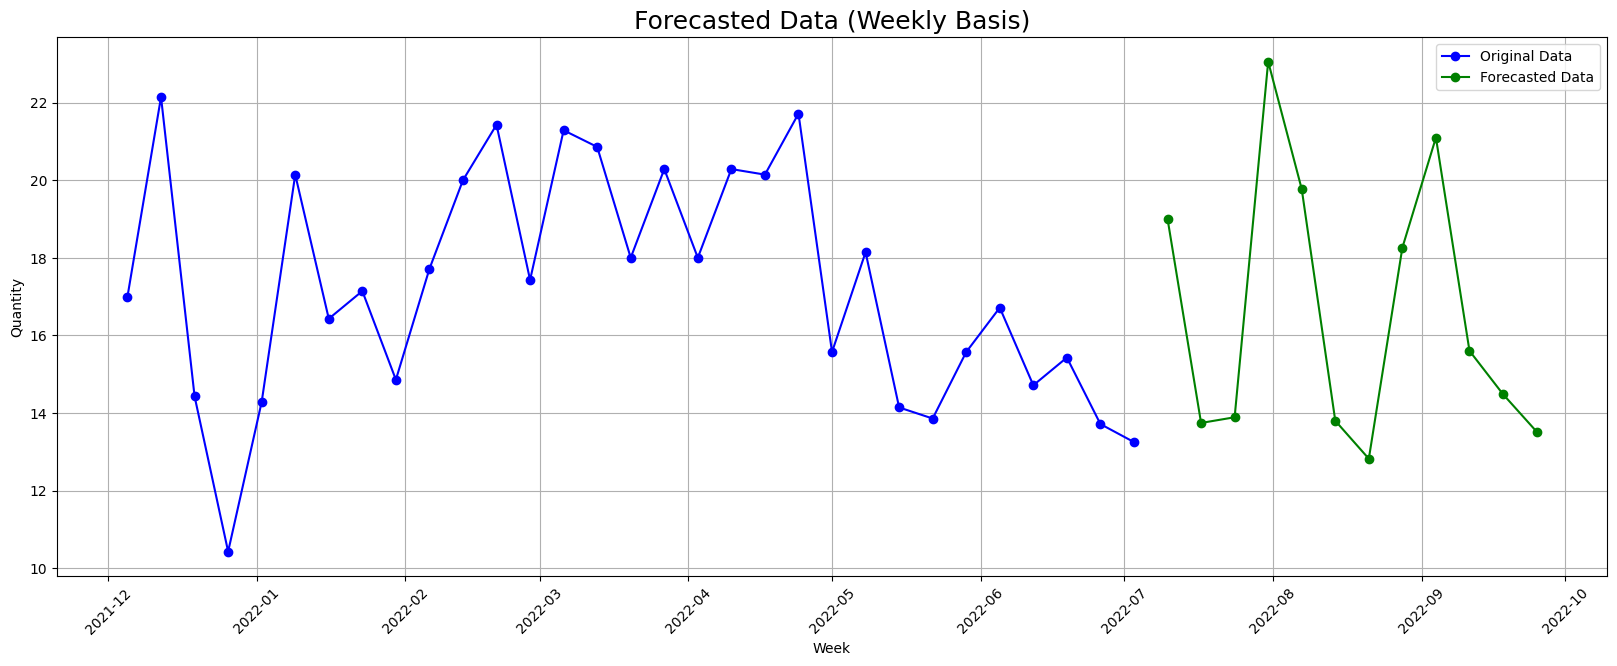

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Ensure the 'Day Index' is in datetime format and set it as the index
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Create 'Weekend' column to mark weekends
data['Weekend'] = data['Day_Of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Use the last 12 weeks of your dataset for forecast evaluation (or any length of test set)
train_size = int(len(data) * 0.9)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Define the exogenous variables (choose the features to be used for forecasting)
exog_train = train[['Impressions', 'Clicks', 'Month_Numeric', 'Day_Of_Week_Numeric', 'Weekend']]
exog_test = test[['Impressions', 'Clicks', 'Month_Numeric', 'Day_Of_Week_Numeric', 'Weekend']]

# Build SARIMAX model
model = SARIMAX(
    train['Imputed_Quantity'],
    exog=exog_train,
    order=(1, 1, 1),  # Non-seasonal components
    seasonal_order=(1, 1, 1, 52),  # Seasonal components, assuming weekly data
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Forecast future exogenous variables (for example, extend the exogenous variables based on the existing data)
# You can predict future values for 'Impressions', 'Clicks', etc., or assume some constant trends

# Extend dates for the forecast period
forecast_period = 12  # Forecast for the next 12 weeks (you can modify this)
future_dates = pd.date_range(start=test.index[-1], periods=forecast_period + 1, freq='W')[1:]

# Create a DataFrame to hold the future exogenous variables (assuming they stay constant for simplicity)
future_exog = pd.DataFrame({
    'Impressions': np.repeat(test['Impressions'].mean(), forecast_period),
    'Clicks': np.repeat(test['Clicks'].mean(), forecast_period),
    'Month_Numeric': np.repeat(test['Month_Numeric'].iloc[-1], forecast_period),
    'Day_Of_Week_Numeric': np.arange(1, forecast_period + 1) % 7,
    'Weekend': np.zeros(forecast_period)  # Assuming no weekends for simplicity
}, index=future_dates)

# Forecast future values (using the exogenous variables)
forecast_values = model_fit.forecast(steps=forecast_period, exog=future_exog)

# Create a DataFrame for the forecasted data
combinedforecast = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast_values
})

# To align forecasted data with actual data, add the last 2 data points from the training data
last_actual_data = data[['Imputed_Quantity']].iloc[-2:]  # Last 2 data points from the training set
forecast_with_past = pd.concat([last_actual_data, combinedforecast]).reset_index(drop=True)

# Now, to prevent the gap, we will plot the original data and forecasted data together on the same axis
plt.figure(figsize=(20, 7))

# Plot original weekly data
weeklydata1 = data.resample('W')['Imputed_Quantity'].mean()
plt.plot(weeklydata1.index, weeklydata1, marker='o', color='blue', label='Original Data')

# Plot forecasted weekly data starting from the 2nd last data point
combinedforecast['Date'] = pd.to_datetime(combinedforecast['Date'])
weeklydata = forecast_with_past.resample('W', on='Date')['Forecast'].mean()
plt.plot(weeklydata.index, weeklydata, marker='o', color='green', label='Forecasted Data')

# Customize plot
plt.title('Forecasted Data (Weekly Basis)', fontsize=18)
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
